# Import dataset dan package

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from fbprophet import Prophet

!pip install dfply
from dfply import *
!pip install catboost

import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN,SMOTETomek,SMOTEENN
from sklearn.model_selection import StratifiedKFold, learning_curve
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 614kB 2.8MB/s 
     |████████████████████████████████| 64.8MB 58kB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 500)

##Impor dataset dan lihat sekilas

In [ ]:
meong = pd.read_csv("https://raw.githubusercontent.com/YusufSulaimanIX7/mysulaimaix7/master/hotel_bookings.csv")
meong.head(10)

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   
5  Resort Hotel            0         14               2015               July   
6  Resort Hotel            0          0               2015               July   
7  Resort Hotel            0          9               2015               July   
8  Resort Hotel            1         85               2015               July   
9  Resort Hotel            1         75               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   
5                        27                          1   
6                        27                          1   
7                        27                          1   
8                        27                          1   
9                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   
5                        0                     2       2       0.0       0   
6                        0                     2       2       0.0       0   
7                        0                     2       2       0.0       0   
8                        0                     3       2       0.0       0   
9                        0                     3       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   
5   BB     GBR      Online TA                TA/TO                  0   
6   BB     PRT         Direct               Direct                  0   
7   FB     PRT         Direct               Direct                  0   
8   BB     PRT      Online TA                TA/TO                  0   
9   HB     PRT  Offline TA/TO                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   
5                       0                               0                  A   
6                       0                               0                  C   
7                       0                               0                  C   
8                       0                               0                  A   
9               

In [ ]:
meong.shape

(119390, 32)

In [ ]:
meong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
meong.describe(include = "all")

hotel    is_canceled      lead_time  arrival_date_year  \
count       119390  119390.000000  119390.000000      119390.000000   
unique           2            NaN            NaN                NaN   
top     City Hotel            NaN            NaN                NaN   
freq         79330            NaN            NaN                NaN   
mean           NaN       0.370416     104.011416        2016.156554   
std            NaN       0.482918     106.863097           0.707476   
min            NaN       0.000000       0.000000        2015.000000   
25%            NaN       0.000000      18.000000        2016.000000   
50%            NaN       0.000000      69.000000        2016.000000   
75%            NaN       1.000000     160.000000        2017.000000   
max            NaN       1.000000     737.000000        2017.000000   

       arrival_date_month  arrival_date_week_number  \
count              119390             119390.000000   
unique                 12                       NaN   
top                August                       NaN   
freq                13877                       NaN   
mean                  NaN                 27.165173   
std                   NaN                 13.605138   
min                   NaN                  1.000000   
25%                   NaN                 16.000000   
50%                   NaN                 28.000000   
75%                   NaN                 38.000000   
max                   NaN                 53.000000   

        arrival_date_day_of_month  stays_in_weekend_nights  \
count               119390.000000            119390.000000   
unique                        NaN                      NaN   
top                           NaN                      NaN   
freq                          NaN                      NaN   
mean                    15.798241                 0.927599   
std                      8.780829                 0.998613   
min                      1.000000                 0.000000   
25%                      8.000000                 0.000000   
50%                     16.000000                 1.000000   
75%                     23.000000                 2.000000   
max                     31.000000                19.000000   

        stays_in_week_nights         adults       children         babies  \
count          119390.000000  119390.000000  119386.000000  119390.000000   
unique                   NaN            NaN            NaN            NaN   
top                      NaN            NaN            NaN            NaN   
freq                     NaN            NaN            NaN            NaN   
mean                2.500302       1.856403       0.103890       0.007949   
std                 1.908286       0.579261       0.398561       0.097436   
min                 0.000000       0.000000       0.000000       0.000000   
25%                 1.000000       2.000000       0.000000       0.000000   
50%                 2.000000       2.000000       0.000000       0.000000   
75%                 3.000000       2.000000       0.000000       0.000000   
max                50.000000      55.000000      10.000000      10.000000   

          meal country market_segment distribution_channel  is_repeated_guest  \
count   119390  118902         119390               119390      119390.000000   
unique       5     177              8                    5                NaN   
top         BB     PRT      Online TA                TA/TO                NaN   
freq     92310   48590          56477                97870                NaN   
mean       NaN     NaN            NaN                  NaN           0.031912   
std        NaN     NaN            NaN                  NaN           0.175767   
min        NaN     NaN            NaN                  NaN           0.000000   
25%        NaN     NaN            NaN                  NaN           0.000000   
50%        NaN     NaN            NaN                  NaN           0.000000   
75%        NaN     

##Cek missing value

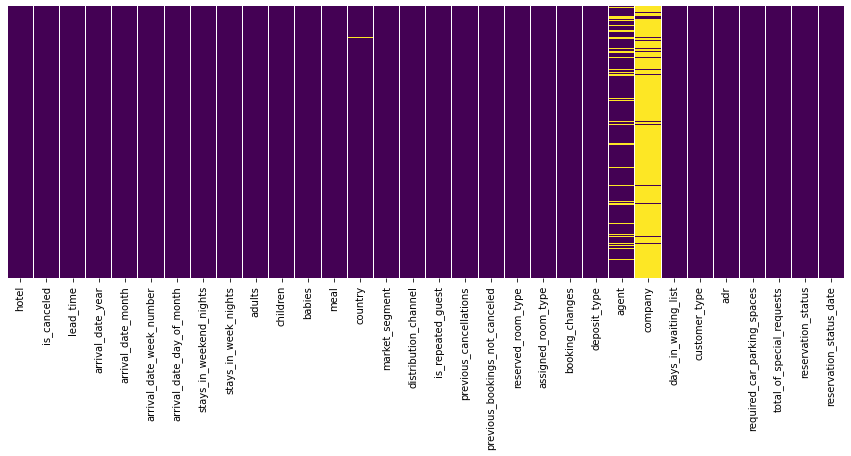

In [ ]:
fig,axes = plt.subplots(1,1,figsize=(15,5))
sns.heatmap(meong.isna(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [ ]:
meong.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# Praproses data

##Replace Mising Value


In [ ]:
# Replace missing values:
nan_replacements = {"children:": 0, "country": "Portugal", "agent": 0, "company": 0}
meong_cln = meong.fillna(nan_replacements)

# "meal" ganti class undefinited menjadi SC.
meong_cln["meal"].replace("Undefined", "SC", inplace=True)

# drop baris dengan kolom adults, children, dan babies yang bernilai 0
zero_guests = list(meong_cln.loc[meong_cln["adults"]
                   + meong_cln["children"]
                   + meong_cln["babies"]==0].index)
meong_cln.drop(meong_cln.index[zero_guests], inplace=True)

##anomali semua pengunjung = 0

In [ ]:
meong[(meong.adults==0) & (meong.children==0) & (meong.babies==0)].shape

(180, 32)

In [ ]:
meong_cln.children[meong.children.isna()] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
meong_cln

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
0                          0       2       0.0       0   BB     PRT   
1                          0       2       0.0       0   BB     PRT   
2                          1       1       0.0       0   BB     GBR   
3                          1       1       0.0       0   BB     GBR   
4                          2       2       0.0       0   BB     GBR   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
0              Direct               Direct                  0   
1              Direct               Direct                  0   
2              Direct               Direct                  0   
3           Corporate            Corporate                  0   
4           Online TA                TA/TO                  0   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
0                            0                               0   
1                            0        

In [ ]:
meong_cln.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

# Cek beberapa kolom

##Cek total pengunjung harian


In [ ]:
meong_cln['arrival_date_day_of_month'].value_counts().sort_index()

1     3620
2     4054
3     3847
4     3760
5     4310
6     3819
7     3658
8     3919
9     4090
10    3569
11    3587
12    4082
13    3744
14    3812
15    4188
16    4071
17    4401
18    3998
19    4048
20    4026
21    3759
22    3593
23    3612
24    3983
25    4155
26    4141
27    3791
28    3942
29    3580
30    3844
31    2207
Name: arrival_date_day_of_month, dtype: int64

##Total pengunjung bulanan


In [ ]:
meong_cln >> group_by(X.arrival_date_year,X.arrival_date_month,X.hotel,) >> summarize(count = X.is_canceled.count()) >> arrange(X.count)

hotel arrival_date_month  arrival_date_year  count
0     City Hotel             August               2015   2474
1   Resort Hotel             August               2015   1409
2     City Hotel           December               2015   1649
3   Resort Hotel           December               2015   1264
4     City Hotel               July               2015   1396
5   Resort Hotel               July               2015   1378
6     City Hotel           November               2015   1233
7   Resort Hotel           November               2015   1104
8     City Hotel            October               2015   3382
9   Resort Hotel            October               2015   1569
10    City Hotel          September               2015   3524
11  Resort Hotel          September               2015   1585
12    City Hotel              April               2016   3558
13  Resort Hotel              April               2016   1867
14    City Hotel             August               2016   3370
15  Resort Hotel             August               2016   1685
16    City Hotel           December               2016   2465
17  Resort Hotel           December               2016   1381
18    City Hotel           February               2016   2365
19  Resort Hotel           February               2016   1519
20    City Hotel            January               2016   1364
21  Resort Hotel            January               2016    884
22    City Hotel               July               2016   3119
23  Resort Hotel               July               2016   1441
24    City Hotel               June               2016   3921
25  Resort Hotel               June               2016   1369
26    City Hotel              March               2016   3041
27  Resort Hotel              March               2016   1778
28    City Hotel                May               2016   3673
29  Resort Hotel                May               2016   1802
30    City Hotel           November               2016   3103
31  Resort Hotel           November               2016   1331
32    City Hotel            October               2016   4212
33  Resort Hotel            October               2016   1984
34    City Hotel          September               2016   3868
35  Resort Hotel          September               2016   1523
36    City Hotel              April               2017   3911
37  Resort Hotel              April               2017   1742
38    City Hotel             August               2017   3123
39  Resort Hotel             August               2017   1800
40    City Hotel           February               2017   2585
41  Resort Hotel           February               2017   1583
42    City Hotel            January               2017   2366
43  Resort Hotel            January               2017   1307
44    City Hotel               July               2017   3556
45  Resort Hotel               July               2017   1754
46    City Hotel               June               2017   3964
47  Resort Hotel               June               2017   1675
48    City Hotel              March               2017   3393
49  Resort Hotel              March               2017   1556
50    City Hotel                May               2017   4548
51  Resort Hotel                May               2017   1757

In [ ]:
meong_cln.shape

(119210, 32)

##Total tamu yang pernah berkunjung sebelumnya


In [ ]:
meong_cln >> group_by(X.is_repeated_guest, X.is_canceled) >> summarize(count = X.is_canceled.count())

is_canceled  is_repeated_guest  count
0            0                  0  71806
1            1                  0  43649
2            0                  1   3205
3            1                  1    550

##Tamu yang pernah cancel sebelumnya

In [ ]:
meong_cln >> group_by(X.previous_cancellations, X.is_canceled) >> summarize(count = X.is_canceled.count())

is_canceled  previous_cancellations  count
0             0                       0  74472
1             1                       0  38259
2             0                       1    336
3             1                       1   5712
4             0                       2     76
5             1                       2     38
6             0                       3     45
7             1                       3     20
8             0                       4     24
9             1                       4      7
10            0                       5     17
11            1                       5      2
12            0                       6     15
13            1                       6      7
14            0                      11     25
15            1                      11     10
16            0                      13      1
17            1                      13     11
18            1                      14     14
19            1                      19     19
20            1                      21      1
21            1                      24     48
22            1                      25     25
23            1                      26     26

##Tipe pengunjung

In [ ]:
meong_cln >> group_by(X.customer_type, X.is_canceled) >> summarize(count = X.is_canceled.count())

is_canceled    customer_type  count
0            0         Contract   2810
1            1         Contract   1262
2            0            Group    516
3            1            Group     58
4            0        Transient  52982
5            1        Transient  36494
6            0  Transient-Party  18703
7            1  Transient-Party   6385

##Agent dengan tingkat booking tertinggi

In [ ]:
meong_cln['agent'].value_counts()

9.0      31922
0.0      16280
240.0    13922
1.0       7187
14.0      3633
7.0       3532
6.0       3290
250.0     2870
241.0     1721
28.0      1657
8.0       1514
3.0       1336
37.0      1228
19.0      1056
40.0      1039
314.0      927
21.0       873
229.0      783
242.0      780
83.0       696
29.0       682
171.0      607
12.0       577
85.0       553
20.0       540
96.0       537
243.0      514
30.0       484
134.0      482
298.0      472
27.0       449
15.0       401
26.0       401
11.0       389
22.0       381
56.0       375
273.0      349
177.0      347
58.0       335
86.0       335
5.0        330
119.0      304
196.0      301
34.0       294
44.0       292
138.0      287
315.0      284
38.0       273
10.0       260
236.0      247
16.0       246
17.0       240
115.0      225
251.0      220
42.0       211
68.0       211
191.0      198
175.0      195
195.0      193
154.0      193
156.0      190
152.0      183
168.0      183
208.0      173
143.0      172
326.0      165
31.0      

In [ ]:
#meong_cln >> filter_by(X.agent == 9 or X.agent == 0) >> group_by(X.agent, X.is_canceled) >> summarise(total = X.is_canceled.count()) 

##Company yang paling sering memesan dan/atau membayar

In [ ]:
meong_cln.company.value_counts()

0.0      112442
40.0        924
223.0       784
67.0        267
45.0        249
153.0       213
174.0       147
219.0       141
281.0       138
154.0       133
405.0       119
233.0       113
51.0         99
94.0         87
47.0         71
135.0        66
169.0        64
242.0        62
331.0        61
348.0        59
498.0        58
110.0        52
38.0         50
20.0         50
91.0         48
280.0        48
342.0        48
197.0        47
62.0         47
68.0         46
270.0        43
218.0        43
202.0        38
195.0        38
148.0        37
9.0          37
307.0        36
113.0        36
204.0        34
308.0        33
238.0        33
269.0        33
86.0         32
72.0         30
385.0        30
365.0        29
43.0         29
343.0        29
221.0        27
144.0        27
178.0        27
46.0         26
337.0        25
418.0        25
179.0        24
424.0        24
366.0        24
227.0        24
81.0         23
507.0        23
477.0        23
407.0        22
88.0    

In [ ]:
meong_cln >> group_by(X.company, X.is_canceled) >> summarize(total = X.is_canceled.count()) 

is_canceled  company  total
0              0      0.0  69424
1              1      0.0  43018
2              0      6.0      1
3              0      8.0      1
4              0      9.0     34
5              1      9.0      3
6              0     10.0      1
7              0     11.0      1
8              0     12.0     14
9              0     14.0      8
10             1     14.0      1
11             0     16.0      5
12             0     18.0      1
13             0     20.0     39
14             1     20.0     11
15             0     22.0      6
16             0     28.0      5
17             0     29.0      2
18             0     31.0     13
19             1     31.0      4
20             0     32.0      1
21             0     34.0      7
22             1     34.0      1
23             0     35.0      1
24             1     37.0     10
25             0     38.0     36
26             1     38.0     14
27             0     39.0      7
28             1     39.0      1
29             0     40.0    847
30             1     40.0     77
31             0     42.0      5
32             0     43.0     11
33             1     43.0     18
34             0     45.0    221
35             1     45.0     28
36             0     46.0     25
37             1     46.0      1
38             0     47.0     60
39             1     47.0     11
40             1     48.0      5
41             0     49.0      4
42             0     51.0     64
43             1     51.0     35
44             0     52.0      2
45             0     53.0      6
46             1     53.0      2
47             0     54.0      1
48             0     59.0      6
49             1     59.0      1
50             0     61.0      2
51             0     62.0     44
52             1     62.0      3
53             0     64.0      1
54             0     65.0      1
55             0     67.0     92
56             1     67.0    175
57             0     68.0     38
58             1     68.0      8
59             0     71.0      2
60             0     72.0     29
61             1     72.0      1
62             0     73.0      2
63             1     73.0      1
64             0     76.0      1
65             1     77.0      1
66             0     78.0     21
67             1     78.0      1
68             0     80.0      1
69             0     81.0     21
70             1     81.0      2
71             0     82.0     11
72             1     82.0      3
73             0     83.0      7
74             1     83.0      2
75             0     84.0      2
76             1     84.0      1
77             0     85.0      1
78             1     85.0      1
79             0     86.0     27
80             1     86.0      5
81             0     88.0     18
82             1     88.0      4
83             0     91.0     44
84             1     91.0      4
85             0     92.0     13
86             0     93.0      2
87             1     93.0      1
88             0     94.0     73
89             1     94.0     14
90             0     96.0      1
91             0     99.0     11
92             1     99.0      1
93             0    100.0      1
94             0    101.0      1
95             1    102.0      1
96             0    103.0     16
97             0    104.0      1
98             0    105.0      8
99             0    106.0      2
100            0    107.0      8
101            1    107.0      1
102            0    108.0     11
103            0    109.0      1
104            0    110.0     35
105            1    110.0     17
106            0    112.0     10
107            1    112.0      3
108            0    113.0     33
109            1    113.0      3
110            0    115.0      3
111            1    115.0      1
112            0    116.0      6
113            0    118.0      7
114            0    120.0     13
115            1    120.0      1
116            1    122.0     18
117            0    126.0      1
118            0    127.0     14
119            1    127.0      1
120         

In [ ]:
meong_cln['meal'].value_counts()

BB    92236
HB    14458
SC    11718
FB      798
Name: meal, dtype: int64

In [ ]:
meong_cln['market_segment'].value_counts()

Online TA        56408
Offline TA/TO    24182
Groups           19791
Direct           12582
Corporate         5282
Complementary      728
Aviation           235
Undefined            2
Name: market_segment, dtype: int64

##Segmentasi Pasar


In [ ]:
meong_cln >> group_by(X.market_segment, X.is_canceled) >> summarize(count = X.is_canceled.count())

is_canceled market_segment  count
0             0       Aviation    183
1             1       Aviation     52
2             0  Complementary    639
3             1  Complementary     89
4             0      Corporate   4291
5             1      Corporate    991
6             0         Direct  10648
7             1         Direct   1934
8             0         Groups   7697
9             1         Groups  12094
10            0  Offline TA/TO  15880
11            1  Offline TA/TO   8302
12            0      Online TA  35673
13            1      Online TA  20735
14            1      Undefined      2

In [ ]:
meong_cln.market_segment[meong_cln.market_segment == 'Undefined'] = 'Online TA'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##Media penjualan 

In [ ]:
meong_cln['distribution_channel'].value_counts()

TA/TO        97750
Direct       14611
Corporate     6651
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [ ]:
meong_cln >> group_by(X.hotel,X.deposit_type, X.is_canceled) >> summarize(count = X.is_canceled.count())

is_canceled deposit_type         hotel  count
0             0   No Deposit    City Hotel  46054
1             1   No Deposit    City Hotel  20221
2             0   Non Refund    City Hotel     24
3             1   Non Refund    City Hotel  12844
4             0   Refundable    City Hotel      6
5             1   Refundable    City Hotel     14
6             0   No Deposit  Resort Hotel  28738
7             1   No Deposit  Resort Hotel   9448
8             0   Non Refund  Resort Hotel     69
9             1   Non Refund  Resort Hotel   1650
10            0   Refundable  Resort Hotel    120
11            1   Refundable  Resort Hotel     22

In [ ]:
meong_cln >> group_by(X.distribution_channel, X.is_canceled) >> summarize(count = X.is_canceled.count())

is_canceled distribution_channel  count
0            0            Corporate   5184
1            1            Corporate   1467
2            0               Direct  12056
3            1               Direct   2555
4            0                  GDS    156
5            1                  GDS     37
6            0                TA/TO  57614
7            1                TA/TO  40136
8            0            Undefined      1
9            1            Undefined      4

##Negara dengan pengunjung terbanyak

In [ ]:
meong_cln["country"].value_counts().head(10)

PRT    48483
GBR    12120
FRA    10401
ESP     8560
DEU     7285
ITA     3761
IRL     3374
BEL     2342
BRA     2222
NLD     2103
Name: country, dtype: int64

In [ ]:
meong_cln['deposit_type'].value_counts()

No Deposit    104461
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [ ]:
meong_cln >> group_by(X.reservation_status, X.is_canceled) >> summarize(count = X.is_canceled.count())

is_canceled reservation_status  count
0            1           Canceled  42993
1            0          Check-Out  75011
2            1            No-Show   1206

- is_canceled, adult, children, babies harusnya kategorik (objek)
- company mesti di drop
- beberapa baris yang ada nilai kosong di kolom country di drop
- kolom year, month dan date day digabung menjadi kolom tanggal
- kolom children diubah menjadi bil bulat
- reserved room type dan assigned room type musti dicek
- kolom reservation_status dibuang

#**EDA**

In [ ]:
rh = meong_cln.loc[(meong_cln["hotel"] == "Resort Hotel") & (meong_cln["is_canceled"] == 0)]
ch = meong_cln.loc[(meong_cln["hotel"] == "City Hotel") & (meong_cln["is_canceled"] == 0)]

##Darimana asal tamu hotel?

In [ ]:
country_data = pd.DataFrame(meong_cln.loc[meong_cln["is_canceled"] == 0]["country"].value_counts())
country_data.index.name = "country"
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data.head()

Number of Guests  Guests in %
country                               
PRT                 20977        27.97
GBR                  9668        12.89
FRA                  8468        11.29
ESP                  6383         8.51
DEU                  6067         8.09

In [ ]:
guest_map = px.choropleth(country_data,
                    locations=country_data.index,
                    color=country_data["Guests in %"], 
                    hover_name=country_data.index, 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of guests")
guest_map.show()



##Berapa banyak tamu membayar untuk sebuah kamar permalam?

In [ ]:
# Jumlah dewasa dan anak - anak yang membayar sebagai tamu
rh["adr_pp"] = rh["adr"] / (rh["adults"] + rh["children"])
ch["adr_pp"] = ch["adr"] / (ch["adults"] + ch["children"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
print("""From all non-cnceled bookings, across all room types and meals, the average prices are:
Resort hotel: {:.2f} € per night and person.
City hotel: {:.2f} € per night and person."""
      .format(rh["adr_pp"].mean(), ch["adr_pp"].mean()))

From all non-cnceled bookings, across all room types and meals, the average prices are:
Resort hotel: 47.49 € per night and person.
City hotel: 59.27 € per night and person.


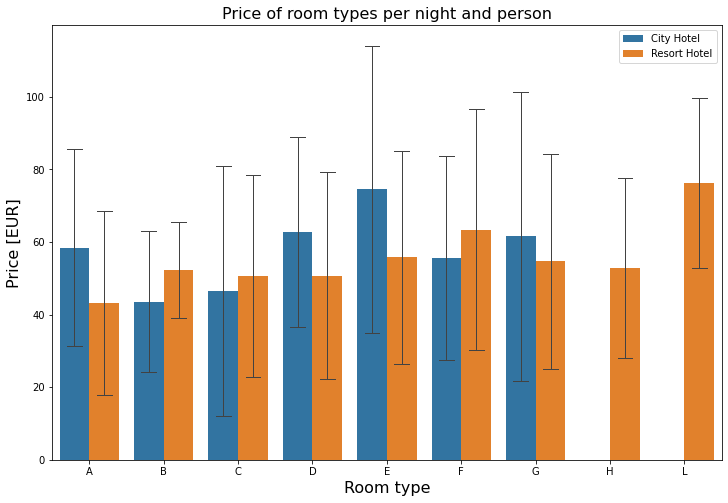

In [ ]:
meong_cln["adr_pp"] = meong_cln["adr"] / (meong_cln["adults"] + meong_cln["children"])
meong_guests = meong_cln.loc[meong_cln["is_canceled"] == 0] # only actual gusts
room_prices = meong_guests[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")

# barplot with standard deviation:
plt.figure(figsize=(12, 8))
sns.barplot(x = "reserved_room_type", y="adr_pp", hue="hotel", data=room_prices, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", errwidth=1, capsize=0.2)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.show()

##Berapa variasi harga permalam sepanjang tahun?

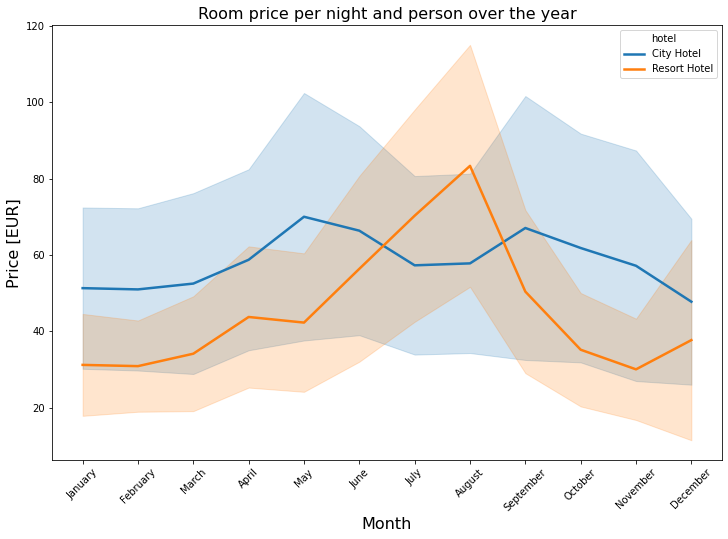

In [ ]:
# grab data:
room_prices_mothly = meong_guests[["hotel", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
room_prices_mothly["arrival_date_month"] = pd.Categorical(room_prices_mothly["arrival_date_month"], categories=ordered_months, ordered=True)

# barplot with standard deviation:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=room_prices_mothly, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()

##Bulan mana yang paling sibuk?


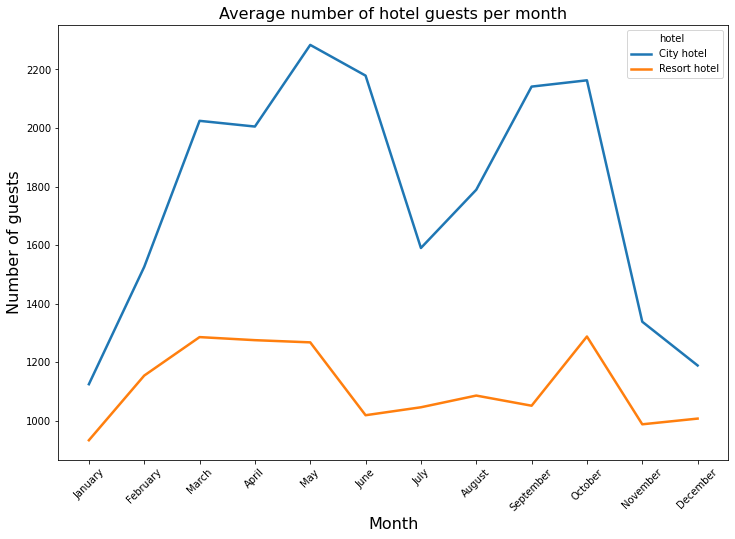

In [ ]:
# Create a DateFrame with the relevant data:
resort_guests_monthly = rh.groupby("arrival_date_month")["hotel"].count()
city_guests_monthly = ch.groupby("arrival_date_month")["hotel"].count()

resort_guest_data = pd.DataFrame({"month": list(resort_guests_monthly.index),
                    "hotel": "Resort hotel", 
                    "guests": list(resort_guests_monthly.values)})

city_guest_data = pd.DataFrame({"month": list(city_guests_monthly.index),
                    "hotel": "City hotel", 
                    "guests": list(city_guests_monthly.values)})
full_guest_data = pd.concat([resort_guest_data,city_guest_data], ignore_index=True)

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_guest_data["month"] = pd.Categorical(full_guest_data["month"], categories=ordered_months, ordered=True)

# Dataset contains July and August date from 3 years, the other month from 2 years. Normalize data:
full_guest_data.loc[(full_guest_data["month"] == "July") | (full_guest_data["month"] == "August"),
                    "guests"] /= 3
full_guest_data.loc[~((full_guest_data["month"] == "July") | (full_guest_data["month"] == "August")),
                    "guests"] /= 2

#show figure:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "month", y="guests", hue="hotel", data=full_guest_data, 
             hue_order = ["City hotel", "Resort hotel"], size="hotel", sizes=(2.5, 2.5))
plt.title("Average number of hotel guests per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of guests", fontsize=16)
plt.show()

- Mret smp Mei musim Semi
- September - Oktober musim gugur
pada bulan november-desember, terjadi kenaikan resort hotel karena libur akhir tahun
musim semi dan gugur peak krn recommended
https://santorinidave.com/best-time-to-visit-portugal

## Berapa banyak kasus terjadinya penggantian tipe kamar akibat overbooking?

In [ ]:
meong['reserved_room_type'].value_counts().sort_values(ascending = False )

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

In [ ]:
meong['assigned_room_type'].value_counts().sort_values(ascending = False )

A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

In [ ]:
meong[meong['reserved_room_type'] != meong['assigned_room_type']].shape[0] 
#banyak terjadi pergantian jenis kamar akibat overbooking

14917

In [ ]:
azz = meong[meong['reserved_room_type'] != meong['assigned_room_type']]

azz.head()

hotel  is_canceled  lead_time  arrival_date_year  \
2   Resort Hotel            0          7               2015   
12  Resort Hotel            0         68               2015   
15  Resort Hotel            0         68               2015   
17  Resort Hotel            0         12               2015   
18  Resort Hotel            0          0               2015   

   arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
2                July                        27                          1   
12               July                        27                          1   
15               July                        27                          1   
17               July                        27                          1   
18               July                        27                          1   

    stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
2                         0                     1       1       0.0       0   
12                        0                     4       2       0.0       0   
15                        0                     4       2       0.0       0   
17                        0                     1       2       0.0       0   
18                        0                     1       2       0.0       0   

   meal country market_segment distribution_channel  is_repeated_guest  \
2    BB     GBR         Direct               Direct                  0   
12   BB     USA      Online TA                TA/TO                  0   
15   BB     IRL      Online TA                TA/TO                  0   
17   BB     IRL      Online TA                TA/TO                  0   
18   BB     FRA      Corporate            Corporate                  0   

    previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
2                        0                               0                  A   
12                       0                               0                  D   
15                       0                               0                  D   
17                       0                               0                  A   
18                       0                               0                  A   

   assigned_room_type  booking_changes deposit_type  agent  company  \
2                   C                0   No Deposit    NaN      NaN   
12                  E                0   No Deposit  240.0      NaN   
15                  E                0   No Deposit  240.0      NaN   
17                  E                0   No Deposit  240.0      NaN   
18                  G                0   No Deposit    NaN    110.0   

    days_in_waiting_list customer_type     adr  required_car_parking_spaces  \
2                      0     Transient   75.00                            0   
12                     0     Transient   97.00                            0   
15                     0     Transient   97.00                            0   
17                     0     Transient   88.20                            0   
18                     0     Transient  107.42                            0   

    total_of_special_requests reservation_status reservation_status_date  
2                           0          Check-Out              2015-07-02  
12                          3          Check-Out              2015-07-05  
15                          3          Check-Out              2015-07-05  
17                          0          Check-Out              2015-07-02  
18                          0          Check-Out              2015-07-02

In [ ]:
meong[(meong.reserved_room_type != meong.assigned_room_type) & (meong.is_canceled == 1)].sum()

hotel                             Resort HotelResort HotelResort HotelResort Hot...
is_canceled                                                                     802
lead_time                                                                     62809
arrival_date_year                                                           1616963
arrival_date_month                JulyJulyJulyJulyJulyJulyJulyJulyAugustAugustAu...
arrival_date_week_number                                                      20745
arrival_date_day_of_month                                                     13158
stays_in_weekend_nights                                                         647
stays_in_week_nights                                                           1713
adults                                                                         1363
children                                                                         64
babies                                                                      

In [ ]:
meong_cln >> group_by(X.assigned_room_type, X.reserved_room_type, X.is_canceled) >> summarize(total = X.is_canceled.count()) 

is_canceled reserved_room_type assigned_room_type  total
0              0                  A                  A  40639
1              1                  A                  A  32927
2              0                  B                  A    109
3              1                  B                  A      2
4              0                  C                  A      5
5              0                  D                  A    301
6              1                  D                  A     10
7              0                  E                  A     12
8              1                  E                  A      3
9              0                  F                  A      6
10             0                  G                  A      4
11             1                  G                  A      1
12             0                  L                  A      1
13             0                  A                  B    975
14             1                  A                  B    146
15             0                  B                  B    621
16             1                  B                  B    365
17             0                  C                  B      2
18             0                  D                  B     27
19             0                  E                  B      2
20             0                  F                  B     14
21             0                  G                  B      1
22             0                  L                  B      1
23             0                  A                  C   1305
24             1                  A                  C    139
25             0                  C                  C    577
26             1                  C                  C    305
27             0                  D                  C     32
28             1                  D                  C      1
29             0                  E                  C      8
30             0                  G                  C      2
31             1                  L                  C      1
32             0                  A                  D   7221
33             1                  A                  D    319
34             0                  B                  D      5
35             0                  C                  D      6
36             0                  D                  D  11690
37             1                  D                  D   6041
38             0                  E                  D     21
39             1                  E                  D      1
40             0                  F                  D      3
41             1                  F                  D      1
42             0                  H                  D      1
43             0                  A                  E   1108
44             1                  A                  E     47
45             0                  B                  E      2
46             0                  C                  E      4
47             0                  D                  E    651
48             1                  D                  E     35
49             0                  E                  E   4036
50             1                  E                  E   1880
51             0                  F                  E     31
52             0                  G                  E      4
53             0                  A                  F    390
54             1                  A                  F     27
55             0                  B                  F      2
56             0                  C                  F      2
57             0                  D                  F    198
58             1                  D                  F      6
59             0                  E                  F    385
60             1                  E                  F     19
61             0                  F                  F   1833
62             1                  F                  F    874
63             0                  G  

In [ ]:
meong_cln >> group_by(X.country, X.is_canceled) >> summarize(total = X.is_canceled.count()) 

is_canceled   country  total
0              0       ABW      2
1              0       AGO    157
2              1       AGO    205
3              0       AIA      1
4              0       ALB     10
5              1       ALB      2
6              0       AND      2
7              1       AND      5
8              0       ARE      8
9              1       ARE     43
10             0       ARG    160
11             1       ARG     54
12             0       ARM      6
13             1       ARM      2
14             0       ASM      1
15             0       ATA      2
16             0       ATF      1
17             0       AUS    319
18             1       AUS    107
19             0       AUT   1033
20             1       AUT    230
21             0       AZE      8
22             1       AZE      9
23             0       BDI      1
24             0       BEL   1868
25             1       BEL    474
26             1       BEN      3
27             0       BFA      1
28             0       BGD      3
29             1       BGD      9
30             0       BGR     63
31             1       BGR     12
32             0       BHR      1
33             1       BHR      4
34             0       BHS      1
35             0       BIH     10
36             1       BIH      3
37             0       BLR     17
38             1       BLR      9
39             0       BOL     10
40             0       BRA   1392
41             1       BRA    830
42             0       BRB      4
43             0       BWA      1
44             0       CAF      5
45             0       CHE   1298
46             1       CHE    428
47             0       CHL     49
48             1       CHL     16
49             0       CHN    537
50             1       CHN    462
51             0       CIV      4
52             1       CIV      2
53             0       CMR     10
54             0        CN   1025
55             1        CN    254
56             0       COL     48
57             1       COL     23
58             0       COM      2
59             0       CPV     12
60             1       CPV     12
61             0       CRI     18
62             1       CRI      1
63             0       CUB      8
64             0       CYM      1
65             0       CYP     40
66             1       CYP     11
67             0       CZE    134
68             1       CZE     37
69             0       DEU   6067
70             1       DEU   1218
71             0       DJI      1
72             0       DMA      1
73             0       DNK    326
74             1       DNK    109
75             0       DOM      6
76             1       DOM      8
77             0       DZA     82
78             1       DZA     21
79             0       ECU     19
80             1       ECU      8
81             0       EGY     21
82             1       EGY     11
83             0       ESP   6383
84             1       ESP   2177
85             0       EST     65
86             1       EST     18
87             0       ETH      2
88             1       ETH      1
89             0       FIN    377
90             1       FIN     69
91             1       FJI      1
92             0       FRA   8468
93             1       FRA   1933
94             0       FRO      1
95             1       FRO      4
96             0       GAB      2
97             1       GAB      2
98             0       GBR   9668
99             1       GBR   2452
100            0       GEO      7
101            1       GEO     15
102            1       GGY      3
103            0       GHA      2
104            1       GHA      2
105            0       GIB      7
106            1       GIB     11
107            1       GLP      2
108            0       GNB      8
109            1       GNB      1
110            0       GRC     93
111            1       GRC     35
112            0       GTM      4
113            0       GUY      1
114            0       HKG      3
115            1       HKG     26
116            1       HND 

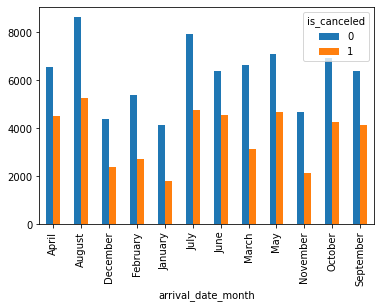

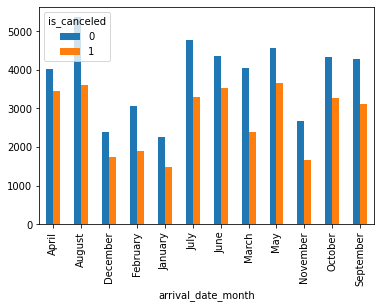

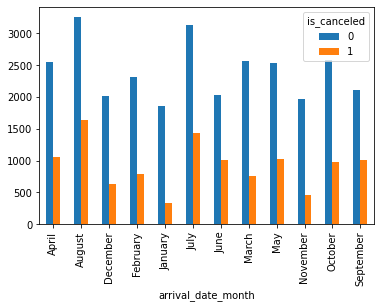

In [ ]:
c = meong_cln[meong_cln.hotel=='City Hotel']
r = meong_cln[meong_cln.hotel=='Resort Hotel']

pd.crosstab(meong_cln.arrival_date_month, meong_cln.is_canceled).plot(kind='bar', stacked = False)
plt.show()
(pd.crosstab(c.arrival_date_month, c.is_canceled)).plot(kind='bar', stacked = False)
plt.show()
(pd.crosstab(r.arrival_date_month, r.is_canceled)).plot(kind='bar', stacked = False)
plt.show()


## Bagaimana pengaruh waiting list terhadap kemungkinan seseorang membatalkan pesanan?

In [ ]:
print(meong_cln[(meong_cln.days_in_waiting_list > 0) & (meong_cln.is_canceled == 1)].shape[0] )
print(len(meong_cln[(meong_cln.days_in_waiting_list > 0)]))

2359
3693


In [ ]:
print(meong_cln[(meong_cln.days_in_waiting_list > 0) & (meong_cln.is_canceled == 1) & (meong_cln.hotel == 0)].shape[0])
print(len(meong_cln[(meong_cln.days_in_waiting_list > 0) & (meong_cln.hotel == 0)]))

0
0


In [ ]:
print(meong_cln[(meong_cln.days_in_waiting_list > 0) & (meong_cln.is_canceled == 1) & (meong_cln.hotel == 1)].shape[0])
print(len(meong_cln[(meong_cln.days_in_waiting_list > 0) & (meong_cln.hotel == 1)]))

0
0


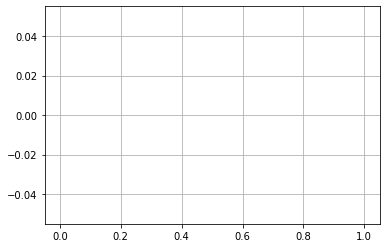

In [ ]:
meong_cln.days_in_waiting_list[meong_cln.hotel==0].hist()

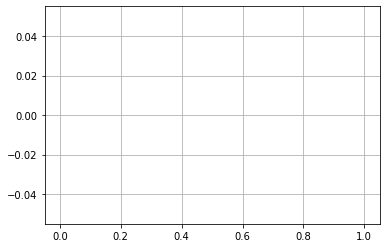

In [ ]:
meong_cln.days_in_waiting_list[meong_cln.hotel==1].hist()

#Deteksi Pencilan

In [ ]:
meong["reservation_status_date"]=pd.to_datetime(meong["reservation_status_date"])
is_cancelled_plot=meong.groupby("reservation_status_date").is_canceled.sum().reset_index().sort_values(by=["reservation_status_date"])
is_cancelled_plot.head()

reservation_status_date  is_canceled
0              2014-10-17          180
1              2014-11-18            1
2              2015-01-01          763
3              2015-01-02           16
4              2015-01-18            1

In [ ]:
is_cancelled_plot.tail()

reservation_status_date  is_canceled
921              2017-09-08            0
922              2017-09-09            0
923              2017-09-10            0
924              2017-09-12            0
925              2017-09-14            0

In [ ]:
days = pd.date_range("2015-01-01", "2017-09-14", freq='D')
is_cancelled_fill=pd.DataFrame({"reservation_status_date":days})
is_cancelled_fill=pd.merge(is_cancelled_plot[2:],is_cancelled_fill,on="reservation_status_date", how="outer")
is_cancelled_fill=is_cancelled_fill.fillna(0)
is_cancelled_fill.head()

reservation_status_date  is_canceled
0              2015-01-01        763.0
1              2015-01-02         16.0
2              2015-01-18          1.0
3              2015-01-20          2.0
4              2015-01-21         91.0

In [ ]:
AllindexOutlier=[]    
df_table = is_cancelled_fill["is_canceled"].copy()
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1- 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("lower bound is " + str(lower_bound))
print("upper bound is " + str(upper_bound))
print(Q1)
print(Q3)
outliers_vector = (df_table < (lower_bound)) | (df_table > (upper_bound) )
outliers_vector
outliers = df_table[outliers_vector]
listOut=outliers.index.to_list()
for t in listOut:
    AllindexOutlier.append(t)

lower bound is -49.5
upper bound is 114.5
12.0
53.0


In [ ]:
AllindexOutlier[0:15]

[0, 120, 124, 141, 170, 189, 231, 252, 258, 289, 308, 318, 320, 321, 324]

In [ ]:
for i in AllindexOutlier:
    is_cancelled_fill.loc[i,"is_canceled"]=is_cancelled_fill.is_canceled.mean()

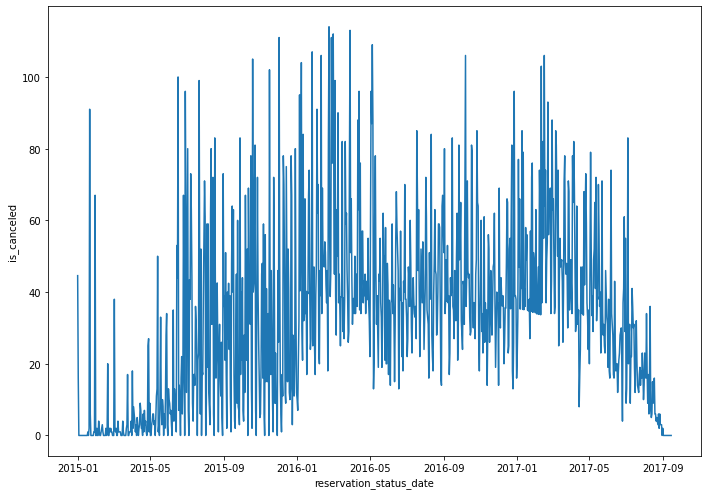

In [ ]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(ax=ax,x="reservation_status_date", y="is_canceled", data=is_cancelled_fill)

#Forecast canclled dengan facebook propet


In [ ]:
def test_train_split(data, test_split,datecol):
    test_train_ind = (data[datecol][data[datecol] < test_split].index.values,
                      data[datecol][data[datecol] >= test_split].index.values)
    data_train = data.iloc[test_train_ind[0],].reset_index(drop=True)
    data_test = data.iloc[test_train_ind[1],].reset_index(drop=True)
    return data_train, data_test

In [ ]:
is_cancelled_fill.columns=["ds","y"]
data_train,data_test=test_train_split(is_cancelled_fill, "2017-01-01","ds")
data_test.head()

ds     y
0 2017-01-01  22.0
1 2017-01-02  33.0
2 2017-01-03  77.0
3 2017-01-04  47.0
4 2017-01-05  66.0

In [ ]:
m = Prophet()
m.fit(data_train)
future = m.make_future_dataframe(periods=len(data_test))
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
data_test=pd.merge(data_test,forecast,on="ds",how="inner")

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


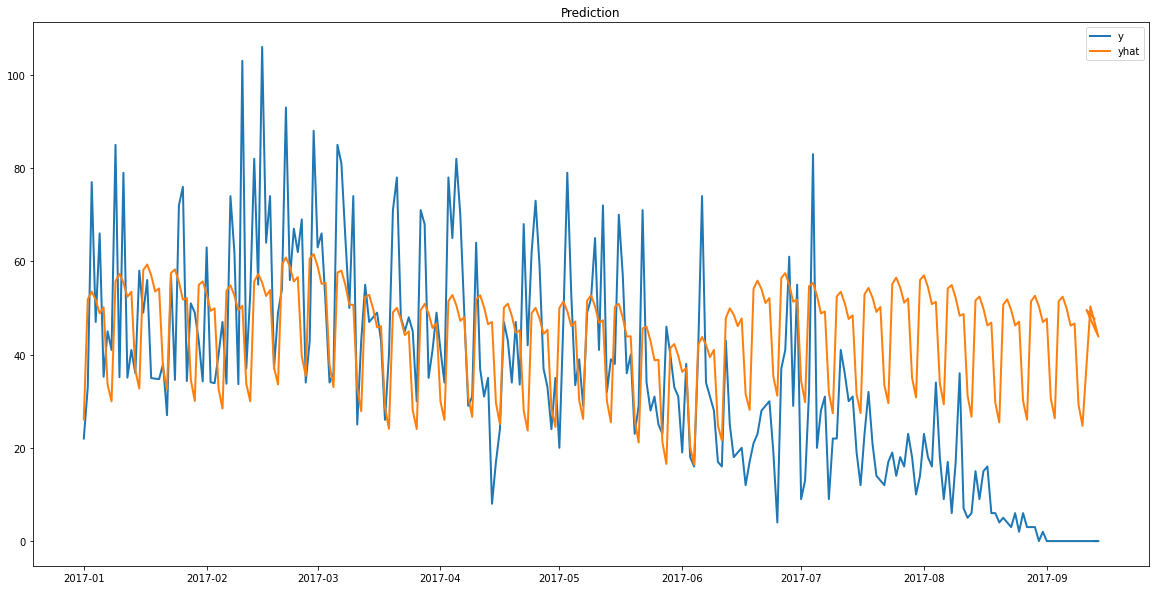

In [ ]:
plt.figure(figsize=(20,10))
lines = plt.plot(data_test.ds, data_test.y, data_test.ds, data_test.yhat)
plt.setp(lines[0], linewidth=2)
plt.setp(lines[1], linewidth=2)

plt.legend(('y', 'yhat'),
           loc='upper right')
plt.title('Prediction')
plt.show()

In [ ]:
pd.crosstab(meong_cln['hotel'], meong_cln.is_canceled)
#.plot(kind='bar', stacked = False)
#plt.title('Lead Time & is_cancelled (city)')

is_canceled       0      1
hotel                     
City Hotel    46084  33079
Resort Hotel  28927  11120

#Modeling

##corrplot

In [ ]:
corr = (meong_cln.corr())
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
meong_cln[meong.reservation_status == 'No-Show']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



hotel  is_canceled  lead_time  arrival_date_year  \
122     Resort Hotel            1         36               2015   
328     Resort Hotel            1         55               2015   
343     Resort Hotel            1         47               2015   
467     Resort Hotel            1          6               2015   
472     Resort Hotel            1          3               2015   
970     Resort Hotel            1         54               2015   
1059    Resort Hotel            1         33               2015   
1063    Resort Hotel            1          2               2015   
1472    Resort Hotel            1          0               2015   
1553    Resort Hotel            1         48               2015   
1596    Resort Hotel            1         94               2015   
1656    Resort Hotel            1        144               2015   
2051    Resort Hotel            1         13               2015   
2274    Resort Hotel            1         77               2015   
2350    Resort Hotel            1         35               2015   
2565    Resort Hotel            1          3               2015   
2586    Resort Hotel            1         22               2015   
2664    Resort Hotel            1          4               2015   
2667    Resort Hotel            1          4               2015   
2708    Resort Hotel            1          0               2015   
2835    Resort Hotel            1         33               2015   
2836    Resort Hotel            1          1               2015   
2840    Resort Hotel            1         33               2015   
2983    Resort Hotel            1         38               2015   
2984    Resort Hotel            1         38               2015   
2988    Resort Hotel            1         30               2015   
3076    Resort Hotel            1         44               2015   
3171    Resort Hotel            1         73               2015   
3237    Resort Hotel            1        157               2015   
3239    Resort Hotel            1         13               2015   
3372    Resort Hotel            1         46               2015   
3588    Resort Hotel            1          0               2015   
3589    Resort Hotel            1          0               2015   
3590    Resort Hotel            1          0               2015   
3591    Resort Hotel            1          0               2015   
3592    Resort Hotel            1          0               2015   
3593    Resort Hotel            1          0               2015   
3594    Resort Hotel            1          0               2015   
3595    Resort Hotel            1          0               2015   
3596    Resort Hotel            1          0               2015   
3597    Resort Hotel            1          0               2015   
3598    Resort Hotel            1          0               2015   
3599    Resort Hotel            1          0               2015   
3600    Resort Hotel            1          0               2015   
3601    Resort Hotel            1          0               2015   
3602    Resort Hotel            1          0               2015   
3603    Resort Hotel            1          0               2015   
3604    Resort Hotel            1          0               2015   
3615    Resort Hotel            1        107               2015   
3623    Resort Hotel            1         31               2015   
3740    Resort Hotel            1          2               2016   
3796    Resort Hotel            1          2               2016   
3799    Resort Hotel            1         11               2016   
3815    Resort Hotel            1          8               2016   
3817    Resort Hotel            1         99               2016   
3828    Resort Hotel            1          1               2016   
3842    Resort Hotel            1         13               2016   
3843    Resort Hotel            1         11               2016   
3844    Resort Hotel            1          1               201

##drop attribute

In [ ]:
meong_cln.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'adr_pp'],
      dtype='object')

##Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
meong_cln["hotel"] = meong_cln["hotel"].astype('category')
meong_cln["hotel"] = meong_cln["hotel"].cat.codes

meong_cln["deposit_type"] = meong_cln["deposit_type"].astype('category')
meong_cln["deposit_type"] = meong_cln["deposit_type"].cat.codes

meong_cln["meal"] = meong_cln["meal"].astype('category')
meong_cln["meal"] = meong_cln["meal"].cat.codes

meong_cln["customer_type"] = meong_cln["customer_type"].astype('category')
meong_cln["customer_type"] = meong_cln["customer_type"].cat.codes

meong_cln["market_segment"] = meong_cln["market_segment"].astype('category')
meong_cln["market_segment"] = meong_cln["market_segment"].cat.codes

meong_cln["distribution_channel"] = meong_cln["distribution_channel"].astype('category')
meong_cln["distribution_channel"] = meong_cln["distribution_channel"].cat.codes

hotel
- 0 = city hotel
-  1 = Resort hotel

deposit type
- 0 = no deposit
- 1 = no refundable
- 2 = refundable

meal
- 0 = BB
- 1 = FB
- 2 = HB
- 3 = SC

customer type
- 0 = contract
- 1 = group
- 2 = transient
- 3 = transient party

market segment
- 0 = aviation
- 1 = complementary
- 2 = corporate
- 3 = direct
- 4 = groups
- 5 = offline ta/to
- 6 = online ta

In [ ]:
meong_cln['total_duration'] = meong_cln.stays_in_week_nights + meong_cln.stays_in_weekend_nights

##diskretisasi

###Kolom lead_time

Text(0.5, 1.0, 'Lead Time & is_cancelled (resort)')

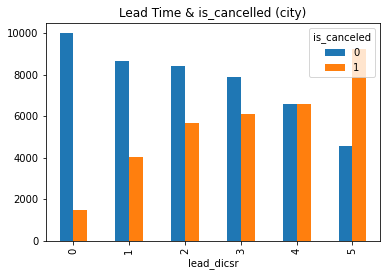

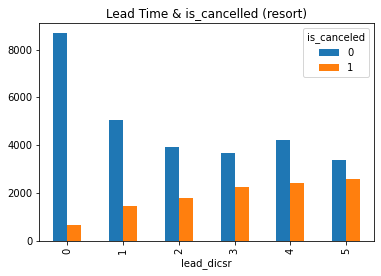

In [ ]:
meong_cln['lead_dicsr'] = pd.qcut(meong_cln['lead_time'], q=6,labels=False)
pd.crosstab(meong_cln['lead_dicsr'], meong_cln.is_canceled[meong_cln.hotel == 0]).plot(kind='bar', stacked = False)
plt.title('Lead Time & is_cancelled (city)')

pd.crosstab(meong_cln['lead_dicsr'], meong_cln.is_canceled[meong_cln.hotel == 1]).plot(kind='bar', stacked = False)
plt.title('Lead Time & is_cancelled (resort)')

- 0-8 = 0
- 8-32 = 1
- 32-69 = 2
- 69-124 = 3
- 124-206 = 4
- 206-737 = 5


###Kolom country

In [ ]:
negara = meong_cln >> group_by(X.country) >> summarize(country_discr = X.country.count())

In [ ]:
negara.isnull().sum()

country          0
country_discr    0
dtype: int64

In [ ]:
meong_cln.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
negara['country_discr'] = pd.cut(negara.country_discr, [-1,7000,9000,20000,50000], labels=False)
negara.sort_values('country_discr',ascending=False)

country  country_discr
135       PRT              3
56        FRA              2
59        GBR              2
43        DEU              1
51        ESP              1
123       NLD              0
116       MWI              0
117       MYS              0
118       MYT              0
119       NAM              0
120       NCL              0
121       NGA              0
122       NIC              0
0         ABW              0
124       NOR              0
132       PLW              0
125       NPL              0
126       NZL              0
127       OMN              0
128       PAK              0
129       PAN              0
130       PER              0
115       MUS              0
114       MRT              0
113       MOZ              0
112       MNE              0
93        LAO              0
94        LBN              0
95        LBY              0
96        LCA              0
97        LIE              0
98        LKA              0
99        LTU              0
100       LUX              0
101       LVA              0
102       MAC              0
103       MAR              0
104       MCO              0
105       MDG              0
106       MDV              0
107       MEX              0
108       MKD              0
109       MLI              0
110       MLT              0
111       MMR              0
131       PHL              0
134       PRI              0
133       POL              0
91        KOR              0
158       TGO              0
159       THA              0
160       TJK              0
161       TMP              0
162       TUN              0
163       TUR              0
164       TWN              0
165       TZA              0
166       UGA              0
167       UKR              0
168       UMI              0
169       URY              0
170       USA              0
171       UZB              0
172       VEN              0
173       VGB              0
174       VNM              0
175       ZAF              0
176       ZMB              0
157       SYR              0
156       SYC              0
155       SWE              0
144       SDN              0
136       PRY              0
137       PYF              0
138  Portugal              0
139       QAT              0
140       ROU              0
141       RUS              0
142       RWA              0
143       SAU              0
145       SEN              0
154       SVN              0
146       SGP              0
147       SLE              0
148       SLV              0
149       SMR              0
150       SRB              0
151       STP              0
152       SUR              0
153       SVK              0
92        KWT              0
89        KIR              0
90        KNA              0
32        CIV              0
24        BOL              0
25        BRA              0
26        BRB              0
27        BWA              0
28        CAF              0
29        CHE              0
30        CHL              0
31        CHN              0
33        CMR              0
22        BIH              0
34         CN              0
35        COL              0
36        COM              0
37        CPV              0
38        CRI              0
39        CUB              0
40        CYM              0
41        CYP              0
23        BLR              0
21        BHS              0
1         AGO              0
10        ATF              0
2         AIA              0
3         ALB              0
4         AND              0
5         ARE              0
6         ARG              0
7         ARM              0
8         ASM              0
9         ATA              0
11        AUS              0
20        BHR              0
12        AUT              0
13        AZE              0
14        BDI              0
15        BEL              0
16        BEN              0
17        BFA              0
18        BGD              0
19        BGR              0
42        CZE              0
44        DJI              0
45        DMA              0
79  

In [ ]:
meong_cln = pd.merge(meong_cln,negara,on='country')

Text(0.5, 1.0, 'Country & is_cancelled (resort)')

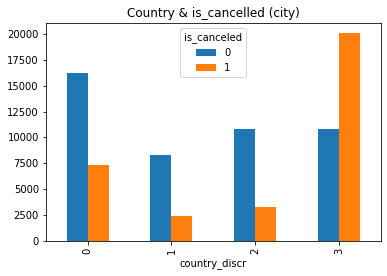

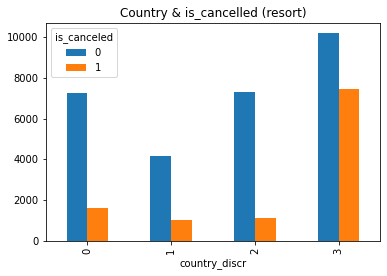

In [ ]:
pd.crosstab(meong_cln['country_discr'], meong_cln.is_canceled[meong_cln.hotel == 0]).plot(kind='bar', stacked = False)
plt.title('Country & is_cancelled (city)')

pd.crosstab(meong_cln['country_discr'], meong_cln.is_canceled[meong_cln.hotel == 1]).plot(kind='bar', stacked = False)
plt.title('Country & is_cancelled (resort)')


Text(0.5, 1.0, 'company & is_cancelled (resort)')

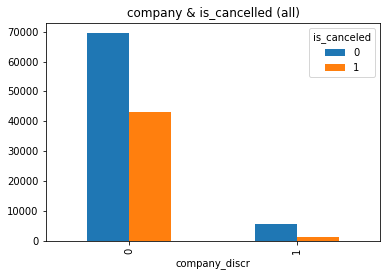

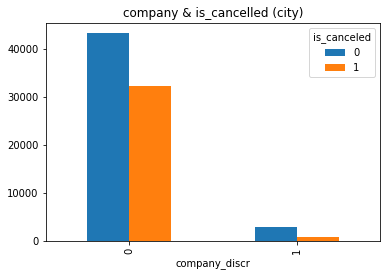

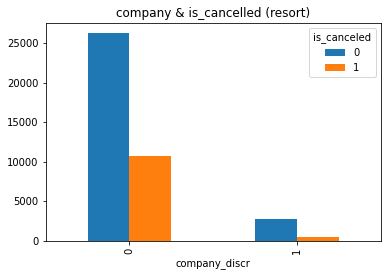

In [ ]:
meong_cln.company = meong_cln.company.astype(int)
meong_cln['company_discr'] = pd.cut(meong_cln.company, [-1,0,200000], labels=False)

pd.crosstab(meong_cln['company_discr'], meong_cln.is_canceled).plot(kind='bar', stacked = False)
plt.title('company & is_cancelled (all)')

pd.crosstab(meong_cln['company_discr'], meong_cln.is_canceled[meong_cln.hotel == 0]).plot(kind='bar', stacked = False)
plt.title('company & is_cancelled (city)')

pd.crosstab(meong_cln['company_discr'], meong_cln.is_canceled[meong_cln.hotel == 1]).plot(kind='bar', stacked = False)
plt.title('company & is_cancelled (resort)')

In [ ]:
meong_cln[meong_cln.company_discr == 1]

###Kolom agent

In [ ]:
agen = X.agent.value_counts()

In [ ]:
agen

In [ ]:
#agen = pd.DataFrame(agen,columns=['agen','total'])

In [ ]:
agen

In [ ]:
meong_cln.agent

0           0.0
1           0.0
2           0.0
3         303.0
4         240.0
          ...  
119205     28.0
119206      9.0
119207      9.0
119208      9.0
119209      9.0
Name: agent, Length: 119210, dtype: float64

In [ ]:
meong_cln.agent.value_counts()

9.0      31922
0.0      16280
240.0    13922
1.0       7187
14.0      3633
7.0       3532
6.0       3290
250.0     2870
241.0     1721
28.0      1657
8.0       1514
3.0       1336
37.0      1228
19.0      1056
40.0      1039
314.0      927
21.0       873
229.0      783
242.0      780
83.0       696
29.0       682
171.0      607
12.0       577
85.0       553
20.0       540
96.0       537
243.0      514
30.0       484
134.0      482
298.0      472
27.0       449
26.0       401
15.0       401
11.0       389
22.0       381
56.0       375
273.0      349
177.0      347
86.0       335
58.0       335
5.0        330
119.0      304
196.0      301
34.0       294
44.0       292
138.0      287
315.0      284
38.0       273
10.0       260
236.0      247
16.0       246
17.0       240
115.0      225
251.0      220
68.0       211
42.0       211
191.0      198
175.0      195
154.0      193
195.0      193
156.0      190
168.0      183
152.0      183
208.0      173
143.0      172
326.0      165
31.0      

In [ ]:
print(meong_cln.company.value_counts())

0      112442
40        924
223       784
67        267
45        249
153       213
174       147
219       141
281       138
154       133
405       119
233       113
51         99
94         87
47         71
135        66
169        64
242        62
331        61
348        59
498        58
110        52
20         50
38         50
342        48
91         48
280        48
62         47
197        47
68         46
270        43
218        43
202        38
195        38
148        37
9          37
113        36
307        36
204        34
269        33
238        33
308        33
86         32
385        30
72         30
343        29
365        29
43         29
144        27
178        27
221        27
46         26
418        25
337        25
227        24
424        24
366        24
179        24
81         23
507        23
477        23
78         22
407        22
88         22
286        21
216        21
209        19
150        19
292        18
396        18
122        18
251   

###Kolom  reserved dan assigned room_type

In [ ]:
meong_cln.reserved_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'H', 'F', 'L', 'B'], dtype=object)

In [ ]:
meong_cln.assigned_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'H', 'F', 'I', 'B', 'L', 'K'],
      dtype=object)

In [ ]:
meong_cln["reserved_room_type"] = meong_cln["reserved_room_type"].astype('category')
meong_cln["reserved_room_type"] = meong_cln["reserved_room_type"].cat.codes

meong_cln["assigned_room_type"] = meong_cln["assigned_room_type"].astype('category')
meong_cln["assigned_room_type"] = meong_cln["assigned_room_type"].cat.codes

In [ ]:
meong_cln.shape

(119210, 37)

##Noise

In [ ]:
meong_cln.adr[meong_cln.adr <0] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
meong_cln[meong_cln.adr == 0]


In [ ]:
meong_cln = meong_cln[meong_cln.adr != 0]

In [ ]:
outlier_adult = meong_cln[meong_cln.adults > 5]
outlier_adult


Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date, adr_pp, total_duration, lead_dicsr, country_discr, company_discr]
Index: []

In [ ]:
meong_cln[meong_cln.babies > 1].shape

(17, 37)

drop karena ga pengaruh

In [ ]:
meong_cln[meong_cln.children > 3]

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
177      1            1         55               2015               July   

     arrival_date_week_number  arrival_date_day_of_month  \
177                        29                         12   

     stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
177                        4                    10       2      10.0       0   

     meal country  market_segment  distribution_channel  is_repeated_guest  \
177     0     PRT               5                     3                  0   

     previous_cancellations  previous_bookings_not_canceled  \
177                       0                               0   

     reserved_room_type  assigned_room_type  booking_changes  deposit_type  \
177                   3                   3                2             0   

     agent  company  days_in_waiting_list  customer_type     adr  \
177    8.0        0                     0              0  133.16   

     required_car_parking_spaces  total_of_special_requests  \
177                            0                          1   

    reservation_status reservation_status_date     adr_pp  total_duration  \
177            No-Show              2015-07-12  11.096667              14   

     lead_dicsr  country_discr  company_discr  
177           2              3              0

In [ ]:
meong_cln[meong_cln.total_duration > 40]

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
2341       1            1        122               2016            January   
5849       1            1        322               2017            January   
48862      1            0        214               2016            January   
53410      1            0          1               2017           February   
53758      1            0         71               2017            January   
53974      1            0        150               2017           February   
85136      1            0        113               2015             August   
85137      1            0        126               2016               July   
88795      1            0        242               2017           February   

       arrival_date_week_number  arrival_date_day_of_month  \
2341                          3                         12   
5849                          2                         10   
48862                         5                         26   
53410                         5                          3   
53758                         2                         10   
53974                         9                         26   
85136                        31                          1   
85137                        28                          5   
88795                         7                         17   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
2341                        12                    30       2       0.0   
5849                        16                    40       2       0.0   
48862                       12                    30       2       0.0   
53410                       13                    32       1       0.0   
53758                       16                    40       2       0.0   
53974                       12                    30       2       0.0   
85136                       18                    42       1       0.0   
85137                       19                    50       1       0.0   
88795                       12                    30       2       0.0   

       babies  meal   country  market_segment  distribution_channel  \
2341        0     0       PRT               5                     3   
5849        0     0       PRT               5                     3   
48862       0     0       GBR               5                     3   
53410       0     0       GBR               3                     1   
53758       0     0       GBR               6                     3   
53974       0     0       GBR               5                     3   
85136       0     2  Portugal               3                     1   
85137       0     2  Portugal               3                     1   
88795       0     0       DEU               5                     3   

       is_repeated_guest  previous_cancellations  \
2341                   0                       0   
5849                   0                       0   
48862                  0                       0   
53410                  1                       0   
53758                  0                       0   
53974                  0                       0   
85136                  0                       0   
85137                  0                       0   
88795                  0                       0   

       previous_bookings_not_canceled  reserved_room_type  assigned_room_type  \
2341                                0                   0                   0   
5849                                0                   0                   0   
48862                               0                   3                   3   
53410                               1                   0                   3   
53758                               0                   0                   0   
53974                               0                   3                   3   
85136                               0                   4        

In [ ]:
outlier_lead = meong_cln[meong_cln.lead_time > 650]
#outlier punya adr=0, total duration =0, kebanyakan resort

meong_cln = meong_cln[meong_cln.lead_time < 650]

In [ ]:
outlier_td = meong_cln[meong_cln.total_duration >50]
#hampir semua transient, adr = 0 dan dari portugal
meong_cln = meong_cln[meong_cln.total_duration <50]

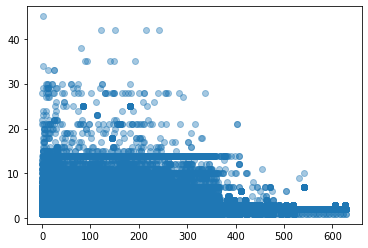

In [ ]:
plt.scatter(meong_cln.lead_time, meong_cln.total_duration,alpha=0.4)


## Drop kolom lama

In [ ]:
'''meong_cln = meong_cln.drop(['lead_time','stays_in_weekend_nights','stays_in_week_nights',
                            'country','previous_cancellations','adr','reservation_status','arrival_date_week_number',
                'arrival_date_year',	'arrival_date_month','arrival_date_day_of_month',
                'reservation_status',	'reservation_status_date'],axis=1)'''


"meong_cln = meong_cln.drop(['lead_time','stays_in_weekend_nights','stays_in_week_nights',\n                            'country','previous_cancellations','adr','reservation_status','arrival_date_week_number',\n                'arrival_date_year',\t'arrival_date_month','arrival_date_day_of_month',\n                'reservation_status',\t'reservation_status_date'],axis=1)"

In [ ]:
meong_cln.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'adr_pp',
       'total_duration', 'lead_dicsr', 'country_discr', 'company_discr'],
      dtype='object')

In [ ]:
meong_cln.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'adr_pp',
       'total_duration', 'lead_dicsr', 'country_discr', 'company_discr'],
      dtype='object')

In [ ]:
columns = ['lead_time','adults', 'children', 'babies', 'meal',
       'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'total_duration', 'country_discr','is_canceled']

tescol =['hotel','adults', 'children', 'babies', 'meal',
       'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',  
       'days_in_waiting_list', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests',
       'total_duration', 'lead_time', 'company_discr','adr']
y=meong_cln['is_canceled']
X=meong_cln[columns]

In [ ]:
y.head()

2    0
3    0
4    1
5    1
6    1
Name: is_canceled, dtype: int64

## FI Pake RF

[1.73883857e-02 1.02093646e-03 6.17893852e-04 5.74115116e-05
 1.52080654e-03 9.34453877e-03 5.98279285e-03 1.57475190e-03
 4.74207238e-03 3.83583876e-04 1.95027804e-03 6.33906319e-03
 1.52211814e-03 6.01870692e-02 2.79326747e-03 1.34887728e-03
 3.69452243e-04 6.22535019e-03 1.59391707e-03 6.15098818e-03
 1.13208069e-02 1.38612489e-03 3.59827719e-02 8.20196741e-01]


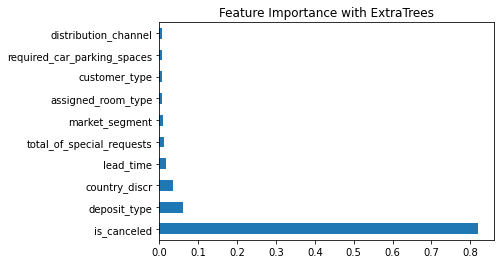

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance with ExtraTrees')
plt.show()

In [ ]:
importance = ['lead_time','adr','deposit_type','country_discr','agent','total_of_special_requests','total_duration','market_segment','previous_cancellations','customer_type']
X = X[importance]

In [ ]:
corr = (X.corr())
corr.style.background_gradient(cmap='coolwarm')

#Predict 1 model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101,stratify = y)

In [ ]:
%%writefile outoffolds.py
# -*- coding: utf-8 -*-
__author__="Necati Demir <ndemir@demir.web.tr>"

import numpy as np
from sklearn import model_selection
import copy

class StackingClassifier():
    """
    This class is a template of stacking method for classification.
    It only provides fit and predict_proba functions, and works with binary [0, 1] labels.
    predict_proba function returns the probability of label 1.
    To learn how to use, see test/test_stackingclassifier.py
    This stacking technique creates prediction dataset by taking the average of
    the out-of-fold predictors' predictions
    """
    def __init__(self, base_classifiers, combiner, n=3):
        self.base_classifiers = base_classifiers
        self.combiner = combiner
        self.n = n
        self.models = [[None for j in range(n)] for i in range(len(base_classifiers))]
        self.cv = model_selection.StratifiedKFold(n_splits=self.n, random_state=7)

    def fit(self, X, y):
        stacking_train = np.full(
            (np.shape(X)[0], len(self.base_classifiers)),
            np.nan
        )
        for model_no in range(len(self.base_classifiers)):
            cv = self.cv
            j = 0
            for traincv, testcv in cv.split(X,y):
                self.base_classifiers[model_no].fit(X[traincv, ], y[traincv])
                predicted_y_proba = self.base_classifiers[model_no].predict_proba(X[testcv,])[:, 1]
                stacking_train[testcv, model_no] = predicted_y_proba
                self.models[model_no][j] = copy.deepcopy(self.base_classifiers[model_no])
                j+=1
        self.combiner.fit(stacking_train, y)

    def predict_proba(self, X):
        stacking_predict_data = np.full(
            (np.shape(X)[0], len(self.base_classifiers)),
            np.nan
        )
        for model_no in range(len(self.base_classifiers)):
            dataset_blend = np.full(
                (np.shape(X)[0], len(self.models[model_no])),
                np.nan
            )
            for j in range(len(self.models[model_no])):
                dataset_blend[:, j] = self.models[model_no][j].predict_proba(X)[:, 1]
            stacking_predict_data[:, model_no] = dataset_blend.mean(1)
        return self.combiner.predict_proba(stacking_predict_data)[:, 1]

Writing outoffolds.py


In [ ]:
%%writefile StackingClassifier.py
# -*- coding: utf-8 -*-

__author__="Necati Demir <ndemir@demir.web.tr>"

import outoffolds


class StackingClassifier():

    ONEGO = 1
    OUTOFFOLDS = 2

    def __init__(self, base_classifiers, combiner, n=3, technique=ONEGO):
        self.stacking = outoffolds.StackingClassifier(base_classifiers, combiner, n)

    def fit(self, X, y):
        self.stacking.fit(X, y)

    def predict_proba(self, X):
        return self.stacking.predict_proba(X)

Writing StackingClassifier.py


In [ ]:
#Manual tuning parameter result for gradient boosting model
xgb_model = xgb.XGBClassifier(max_depth=8, 
                         n_estimators=500, 
                         min_child_weight=1000,  
                         colsample_bytree=0.7, 
                         subsample=0.7, 
                         eta=0.3, 
                         seed=0)

catboost_model = CatBoostClassifier(
    iterations=500,
    max_ctr_complexity=4,
    random_seed=0,
    od_type='Iter',
    od_wait=25,
    depth=4,
    silent=True
)


lgbm_model = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=1000)

extra_model = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features=6,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=3, min_samples_split=3,
                     min_weight_fraction_leaf=0.0, n_estimators=300,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
random_forest_model = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
gradient_boosting_model = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=0.1, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=100, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
bagging_model = BaggingClassifier(base_estimator=lgb.LGBMClassifier(max_depth=-1, random_state=314, 
                    silent=True, metric='None', n_jobs=4, n_estimators=1000))

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=9, leaf_size=13, n_jobs=-1)

knn_model_2 = KNeighborsClassifier(n_neighbors=5, leaf_size=9, n_jobs=-1)

sdg_model = linear_model.SGDClassifier(loss='log', random_state=0)

mlp_model = MLPClassifier(alpha=0.1, max_iter=1000)

gaus_model = GaussianNB()

ada_model = AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                                                         random_state=None,
                                                         splitter='best'),
                   learning_rate=0.2, n_estimators=2, random_state=7)

meta_model_1 = LogisticRegression(n_jobs=-1)

        

##Model

In [ ]:
from StackingClassifier import StackingClassifier
model = StackingClassifier(
    base_classifiers=[
        #xgb_model,
        #catboost_model,
        #lgbm_model,
        #knn_model,
        knn_model_2,
        #sdg_model,
        #mlp_model,
        ada_model,
        #gradient_boosting_model,
        extra_model,
        #random_forest_model,
        bagging_model
        
    ],
    combiner=meta_model_1,
    technique=StackingClassifier.OUTOFFOLDS,
)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

cv = KFold(n_splits=5, random_state=7)
classifier = model
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

i = 0
for train, test in cv.split(x_train,y_train):
    i+=1
    probas_ = classifier.fit(x_train.iloc[train].values, y_train.iloc[train]).predict_proba(x_train.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train.iloc[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic ExtraTrees\n')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



KeyError: ignored

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

cv = KFold(n_splits=5, random_state=7)
classifier = xgb_model
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

i = 0
for train, test in cv.split(x_train,y_train):
    i+=1
    probas_ = classifier.fit(x_train.iloc[train].values, y_train.iloc[train]).predict_proba(x_train.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train.iloc[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic AdaBoost\n')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



ValueError: ignored

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.6/dist-packag

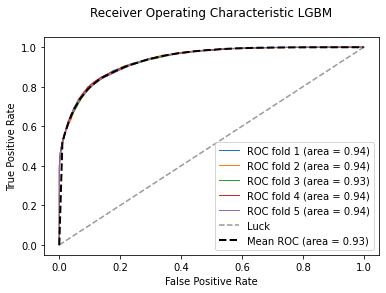

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

cv = KFold(n_splits=5, random_state=7)
classifier = lgbm_model
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

i = 0
for train, test in cv.split(x_train,y_train):
    i+=1
    probas_ = classifier.fit(x_train.iloc[train].values, y_train.iloc[train]).predict_proba(x_train.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train.iloc[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic LGBM\n')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.6/dist-packag

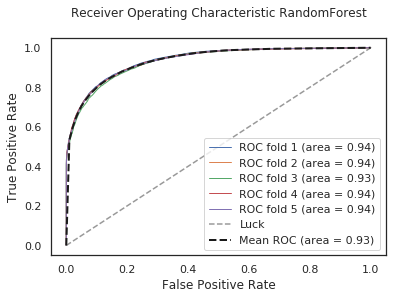

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

cv = KFold(n_splits=5, random_state=7)
classifier = random_forest_model
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

i = 0
for train, test in cv.split(x_train,y_train):
    i+=1
    probas_ = classifier.fit(x_train.iloc[train].values, y_train.iloc[train]).predict_proba(x_train.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train.iloc[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic RandomForest\n')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.6/dist-packag

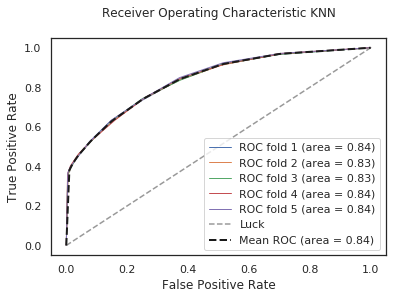

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

cv = KFold(n_splits=5, random_state=7)
classifier = knn_model
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

i = 0
for train, test in cv.split(x_train,y_train):
    i+=1
    probas_ = classifier.fit(x_train.iloc[train].values, y_train.iloc[train]).predict_proba(x_train.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train.iloc[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic KNN\n')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# 0 - 1 Normalization
x_train_tr = MinMaxScaler().fit_transform(x_train)
x_test_tr = MinMaxScaler().fit_transform(x_test)

##PREDICT

In [ ]:

#Fit data train into stacking model
xgb_model.fit(x_train_tr,y_train.ravel())
y_pred1 = model.predict_proba(x_test_tr)
y_pred1 = [1 if i>=0.5 else 0 for i in y_pred1]
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import confusion_matrix
import itertools
confusion_matrix = confusion_matrix(y_test, y_pred1)
labels = ['No Cancellation', 'Cancellation']
plot_confusion_matrix(confusion_matrix, labels, title="City Hotel with Stacking \n Confusion Matrix", cmap=plt.cm.Oranges)

AttributeError: ignored

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

print(confusion_matrix)
print("\n accuracy score:",accuracy_score(y_test, y_pred1))
print("\n recall score:",recall_score(y_test, y_pred1))
print("\n precision score:",precision_score(y_test, y_pred1))
print('\nf1score:', f1_score(y_test, y_pred1, average='macro'))

print("Results of sklearn.metrics:")
print("MAE:",metrics.mean_absolute_error(y_test, y_pred1))
print("MSE:", metrics.mean_squared_error(y_test, y_pred1))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

<function confusion_matrix at 0x7fdd9f1100d0>

 accuracy score: 0.8275930605639001

 recall score: 0.6493221237597516

 precision score: 0.856015976035946

f1score: 0.8049445928940686
Results of sklearn.metrics:
MAE: 0.17240693943609983
MSE: 0.17240693943609983
RMSE: 0.4152191462783235


In [ ]:
#Manual tuning parameter result for gradient boosting model
xgb_model = xgb.XGBClassifier()
catboost_model = CatBoostClassifier()
lgbm_model = lgb.LGBMClassifier()
extra_model = ExtraTreesClassifier()
random_forest_model = RandomForestClassifier()
gradient_boosting_model = GradientBoostingClassifier()
bagging_model = BaggingClassifier(base_estimator=lgb.LGBMClassifier())
knn_model = KNeighborsClassifier(n_neighbors=9, leaf_size=13, n_jobs=-1)

knn_model_2 = KNeighborsClassifier(n_neighbors=5, leaf_size=9, n_jobs=-1)

sdg_model = linear_model.SGDClassifier(loss='log', random_state=0)

mlp_model = MLPClassifier(alpha=0.1, max_iter=1000)

gaus_model = GaussianNB()

ada_model = AdaBoostClassifier()

meta_model_1 = LogisticRegression(n_jobs=-1)

        

In [ ]:
ada_model.fit(x_train,y_train.ravel())
y_pred = ada_model.predict(x_test)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nAdaBoost:')
print("accuracy score:",accuracy_score(y_test, y_pred))
print("recall score:",recall_score(y_test, y_pred))
print("precision score:",precision_score(y_test, y_pred))
print('f1score:', f1_score(y_test, y_pred, average='macro'))
print("Results of sklearn.metrics:")
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

random_forest_model.fit(x_train,y_train.ravel())
y_pred = random_forest_model.predict(x_test)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nRandomForest:')
print("accuracy score:",accuracy_score(y_test, y_pred))
print("recall score:",recall_score(y_test, y_pred))
print("precision score:",precision_score(y_test, y_pred))
print('f1score:', f1_score(y_test, y_pred, average='macro'))
print("Results of sklearn.metrics:")
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


lgbm_model.fit(x_train,y_train.ravel())
y_pred = lgbm_model.predict(x_test)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nLGBM:')
print("accuracy score:",accuracy_score(y_test, y_pred))
print("recall score:",recall_score(y_test, y_pred))
print("precision score:",precision_score(y_test, y_pred))
print('f1score:', f1_score(y_test, y_pred, average='macro'))
print("Results of sklearn.metrics:")
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

knn_model.fit(x_train,y_train.ravel())
y_pred = knn_model.predict(x_test)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nKNN:')
print("accuracy score:",accuracy_score(y_test, y_pred))
print("recall score:",recall_score(y_test, y_pred))
print("precision score:",precision_score(y_test, y_pred))
print('f1score:', f1_score(y_test, y_pred, average='macro'))
print("Results of sklearn.metrics:")
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

extra_model.fit(x_train,y_train.ravel())
y_pred = extra_model.predict(x_test)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nExtraTrees:')
print("accuracy score:",accuracy_score(y_test, y_pred))
print("recall score:",recall_score(y_test, y_pred))
print("precision score:",precision_score(y_test, y_pred))
print('f1score:', f1_score(y_test, y_pred, average='macro'))
print("Results of sklearn.metrics:")
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))





AdaBoost:
accuracy score: 0.8132258156108918
recall score: 0.6616678027720972
precision score: 0.8053839771365354
f1score: 0.7923412858404667
Results of sklearn.metrics:
MAE: 0.18677418438910814
MSE: 0.18677418438910814
RMSE: 0.4321737895674703

RandomForest:
accuracy score: 0.8631420540049405
recall score: 0.79391047489207
precision score: 0.8331611159685239
f1score: 0.8525606531724792
Results of sklearn.metrics:
MAE: 0.1368579459950595
MSE: 0.1368579459950595
RMSE: 0.3699431658985735

LGBM:
accuracy score: 0.8544535619977853
recall score: 0.7499810649094902
precision score: 0.8443762258037009
f1score: 0.8408723700334744
Results of sklearn.metrics:
MAE: 0.1455464380022147
MSE: 0.1455464380022147
RMSE: 0.3815054888231815

KNN:
accuracy score: 0.7737300888724836
recall score: 0.6351586760584715
precision score: 0.7268157392962385
f1score: 0.751757630236638
Results of sklearn.metrics:
MAE: 0.2262699111275164
MSE: 0.2262699111275164
RMSE: 0.4756783694131113

ExtraTrees:
accuracy score: 0

In [ ]:
extra_model = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     criterion='gini', max_depth=None, class_weight='balanced',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=3, min_samples_split=3,
                     min_weight_fraction_leaf=0.0, n_estimators=300,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
extra_model.fit(x_train_tr,y_train.ravel())
y_pred = extra_model.predict(x_test_tr)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nExtraTrees Result After Tuning:')
print("accuracy score:",accuracy_score(y_test, y_pred))
print("recall score:",recall_score(y_test, y_pred))
print("precision score:",precision_score(y_test, y_pred))
print('f1score:', f1_score(y_test, y_pred, average='macro'))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


ExtraTrees Result After Tuning:
accuracy score: 0.8310570998608705
recall score: 0.7564189956827994
precision score: 0.7850797893247387
f1score: 0.8184085685796806
MAE: 0.16894290013912944
MSE: 0.16894290013912944
RMSE: 0.4110266416415479


##Tuning parameter extra trees

In [ ]:
extra_model = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     criterion='gini', max_depth=None, class_weight='balanced',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=3, min_samples_split=3,
                     min_weight_fraction_leaf=0.0, n_estimators=300,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
extra_model.fit(x_train,y_train.ravel())
y_pred = extra_model.predict(x_test)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nExtraTrees Result After Tuning:')
print("accuracy score:",accuracy_score(y_test, y_pred))
print("recall score:",recall_score(y_test, y_pred))
print("precision score:",precision_score(y_test, y_pred))
print('f1score:', f1_score(y_test, y_pred, average='macro'))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


lgbm_model = lgb.LGBMClassifier(max_depth=-1, random_state=314, 
                                boosting_type='gbdt',colsample_bytree = 0.65,num_leaves=6,objective = 'binary',
                                reg_alpha= 1, reg_lambda= 1, subsample= 0.7,
                                silent=True, metric='None', n_jobs=4, n_estimators=1000)
lgbm_model.fit(x_train,y_train.ravel())
y_pred = lgbm_model.predict(x_test)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nLGBM Result After Tuning:')
print("accuracy score:",accuracy_score(y_test, y_pred))
print("recall score:",recall_score(y_test, y_pred))
print("precision score:",precision_score(y_test, y_pred))
print('f1score:', f1_score(y_test, y_pred, average='macro'))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



random_forest_model = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
random_forest_model.fit(x_train,y_train.ravel())
y_pred = random_forest_model.predict(x_test)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nRandomForest Result After Tuning:')
print("accuracy score:",accuracy_score(y_test, y_pred))
print("recall score:",recall_score(y_test, y_pred))
print("precision score:",precision_score(y_test, y_pred))
print('f1score:', f1_score(y_test, y_pred, average='macro'))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


ada_model = AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                                                         random_state=None,
                                                         splitter='best'),
                   learning_rate=0.3, n_estimators=2, random_state=7)
ada_model.fit(x_train,y_train.ravel())
y_pred = ada_model.predict(x_test)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nAdaBoost Result After Tuning:')
print("accuracy score:",accuracy_score(y_test, y_pred))
print("recall score:",recall_score(y_test, y_pred))
print("precision score:",precision_score(y_test, y_pred))
print('f1score:', f1_score(y_test, y_pred, average='macro'))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))





ExtraTrees Result After Tuning:
accuracy score: 0.8572929384707119
recall score: 0.8067863364386881
precision score: 0.811457301744496
f1score: 0.847583747326548
MAE: 0.14270706152928817
MSE: 0.14270706152928817
RMSE: 0.37776588190212224

LGBM Result After Tuning:
accuracy score: 0.8531190550555098
recall score: 0.7496781034613346
precision score: 0.8412374638789734
f1score: 0.83952663972397
MAE: 0.1468809449444902
MSE: 0.1468809449444902
RMSE: 0.38325049894878177

RandomForest Result After Tuning:
accuracy score: 0.8569522132939607
recall score: 0.7233204574717867
precision score: 0.8733424782807498
f1score: 0.8412356792217248
MAE: 0.14304778670603935
MSE: 0.14304778670603935
RMSE: 0.3782165870318743

AdaBoost Result After Tuning:
accuracy score: 0.8451404071665862
recall score: 0.7116564417177914
precision score: 0.8508557457212714
f1score: 0.8284916428996276
MAE: 0.15485959283341377
MSE: 0.15485959283341377
RMSE: 0.3935220360201113


In [ ]:
skf = StratifiedKFold(n_splits=10, random_state=7)
i = 0
score = []
model = random_forest_model
print("CV RandomForest\n")
for train_index, test_index in skf.split(x_train,y_train):
    i+=1
    X_train_split, X_test_split = x_train.iloc[train_index], x_train.iloc[test_index]
    y_train_split, y_test_split = y_train.iloc[train_index], y_train.iloc[test_index]
    model.fit(X_train_split,y_train_split)
    y_pred = model.predict(X_test_split)
    val =  accuracy_score(y_test_split, y_pred)
    #y_result[test_index] = predict
    #score.append(val)
    print(f"Accuracy in CV - {i}: {val}")
score = pd.DataFrame(score)
print('\nMean:',score.sum()/10)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



CV RandomForest

Accuracy in CV - 1: 0.8593331710878559
Accuracy in CV - 2: 0.8513020199561937
Accuracy in CV - 3: 0.8514237040642492
Accuracy in CV - 4: 0.858116330007301
Accuracy in CV - 5: 0.8614018009247992
Accuracy in CV - 6: 0.8469027625654132
Accuracy in CV - 7: 0.8590726542533772
Accuracy in CV - 8: 0.8540829986613119
Accuracy in CV - 9: 0.8565169769989047
Accuracy in CV - 10: 0.8528660094925156

Mean: Series([], dtype: float64)


In [ ]:
score.sum()/10

Series([], dtype: float64)

In [ ]:
skf = StratifiedKFold(n_splits=10, random_state=7)
i = 0
score = []
model = ada_model
print("CV AdaBoost\n")
for train_index, test_index in skf.split(x_train,y_train):
    i+=1
    X_train_split, X_test_split = x_train.iloc[train_index], x_train.iloc[test_index]
    y_train_split, y_test_split = y_train.iloc[train_index], y_train.iloc[test_index]
    model.fit(X_train_split,y_train_split)
    y_pred = model.predict(X_test_split)
    val =  accuracy_score(y_test_split, y_pred)
    #y_result[test_index] = predict
    #score.append(val)
    print(f"Accuracy in CV - {i}: {val}")
  score = pd.DataFrame(score)
print('\nMean:',score.sum()/10)

IndentationError: ignored

In [ ]:
skf = StratifiedKFold(n_splits=10, random_state=7)
i = 0
score = []
model = extra_model
print("CV ExtraTrees\n")
for train_index, test_index in skf.split(x_train,y_train):
    i+=1
    X_train_split, X_test_split = x_train.iloc[train_index], x_train.iloc[test_index]
    y_train_split, y_test_split = y_train.iloc[train_index], y_train.iloc[test_index]
    model.fit(X_train_split,y_train_split)
    y_pred = model.predict(X_test_split)
    val =  accuracy_score(y_test_split, y_pred)
    #y_result[test_index] = predict
    #score.append(val)
    print(f"Accuracy in CV - {i}: {val}")
score = pd.DataFrame(score)
print('\nMean:',score.sum()/10)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



CV ExtraTrees

Accuracy in CV - 1: 0.8553175955220248
Accuracy in CV - 2: 0.8530055974689705
Accuracy in CV - 3: 0.8497201265514723
Accuracy in CV - 4: 0.8583596982234121
Accuracy in CV - 5: 0.8568994889267462
Accuracy in CV - 6: 0.8478763539004502
Accuracy in CV - 7: 0.8602896434221735
Accuracy in CV - 8: 0.8490933430692467
Accuracy in CV - 9: 0.8561518802482658
Accuracy in CV - 10: 0.8497018376536449

Mean: Series([], dtype: float64)


In [ ]:
skf = StratifiedKFold(n_splits=10, random_state=7)
i = 0
score = []
model = lgbm_model
print("CV LGBM\n")
for train_index, test_index in skf.split(x_train,y_train):
    i+=1
    X_train_split, X_test_split = x_train.iloc[train_index], x_train.iloc[test_index]
    y_train_split, y_test_split = y_train.iloc[train_index], y_train.iloc[test_index]
    model.fit(X_train_split,y_train_split)
    y_pred = model.predict(X_test_split)
    val =  accuracy_score(y_test_split, y_pred)
    #y_result[test_index] = predict
    score.append(val)
    print(f"Accuracy in CV - {i}: {val}")
score = pd.DataFrame(score)
print('\nMean:',score.sum()/10)

CV LGBM



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Accuracy in CV - 1: 0.858116330007301
Accuracy in CV - 2: 0.8495984424434169
Accuracy in CV - 3: 0.8509369676320273
Accuracy in CV - 4: 0.8571428571428571
Accuracy in CV - 5: 0.8612801168167438
Accuracy in CV - 6: 0.8437385907265426
Accuracy in CV - 7: 0.8563952780820251
Accuracy in CV - 8: 0.8535962029937934
Accuracy in CV - 9: 0.8552999878301083
Accuracy in CV - 10: 0.8482414506510892

Mean: 0    0.853435
dtype: float64


In [ ]:
skf = StratifiedKFold(n_splits=10, random_state=7)
i = 0
score = []
model = knn_model
print("CV KNN\n")
for train_index, test_index in skf.split(x_train,y_train):
    i+=1
    X_train_split, X_test_split = x_train.iloc[train_index], x_train.iloc[test_index]
    y_train_split, y_test_split = y_train.iloc[train_index], y_train.iloc[test_index]
    model.fit(X_train_split,y_train_split)
    y_pred = model.predict(X_test_split)
    val =  accuracy_score(y_test_split, y_pred)
    #y_result[test_index] = predict
    score.append(val)
    print(f"Accuracy in CV - {i}: {val}")
score = pd.DataFrame(score)
score.sum()/10

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



CV KNN

Accuracy in CV - 1: 0.7714772450717936
Accuracy in CV - 2: 0.7709905086395716
Accuracy in CV - 3: 0.7679484059381845
Accuracy in CV - 4: 0.7739109272329033
Accuracy in CV - 5: 0.7737892431248479
Accuracy in CV - 6: 0.7730315200194718
Accuracy in CV - 7: 0.775708896190824
Accuracy in CV - 8: 0.7656078860898138
Accuracy in CV - 9: 0.7708409395156383
Accuracy in CV - 10: 0.7733966167701107


0    0.77167
dtype: float64

#output

In [ ]:
extra_model = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=None, max_features=6,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=3, min_samples_split=3,
                     min_weight_fraction_leaf=0.0, n_estimators=300,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
extra_model.fit(x_train,y_train.ravel())
y_pred = extra_model.predict(x_test)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nExtraTrees Result After Tuning:')
print("accuracy score:",accuracy_score(y_test, y_pred))
print("recall score:",recall_score(y_test, y_pred))
print("precision score:",precision_score(y_test, y_pred))
print('f1score:', f1_score(y_test, y_pred, average='macro'))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


ExtraTrees Result After Tuning:
accuracy score: 0.8597064084726994
recall score: 0.8300386275846399
precision score: 0.8025043936731108
f1score: 0.8513295092901825
MAE: 0.14029359152730062
MSE: 0.14029359152730062
RMSE: 0.3745578613876641


In [ ]:
data= pd.DataFrame()
data = y_test
data.to_csv("DATAOUTy.csv",index=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning:

The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.



In [ ]:
output= pd.DataFrame()
output['is_canceled'] = y_pred
output['is_canceled'] = output['is_canceled'].astype(int)
output['is_canceled'].replace({0:'0',1:'1'},inplace=True)
output.to_csv("FINAL85.csv",index=False)

lead_time     adr  deposit_type  country_discr  agent  \
88033         149    1.80             0              1   69.0   
85981          48  109.00             0              0    9.0   
20280         210   86.00             0              3   12.0   
35139         377   62.00             1              3    1.0   
55969          82  149.40             0              2    9.0   
...           ...     ...           ...            ...    ...   
32509         113  190.00             1              3   34.0   
115072         38   71.82             0              0    7.0   
41649           2   66.00             0              3    0.0   
65319          42  218.51             0              1  196.0   
81395          40  134.10             0              2    9.0   

        total_of_special_requests  total_duration  market_segment  \
88033                           1              10               5   
85981                           1               1               6   
20280                           0               4               5   
35139                           0               2               4   
55969                           1               3               6   
...                           ...             ...             ...   
32509                           0               3               5   
115072                          0               4               6   
41649                           0               1               2   
65319                           0               4               5   
81395                           1               2               6   

        previous_cancellations  customer_type  
88033                        0              2  
85981                        0              2  
20280                        0              3  
35139                        1              0  
55969                        0              2  
...                        ...            ...  
32509                        0              2  
115072                       0              2  
41649                        0              3  
65319                        0              2  
81395                        0              2  

[35219 rows x 10 columns]

In [ ]:
gridParams = {
    'learning_rate': [0.005],
    'n_estimators': [40],
    'num_leaves': [6,8,12,16],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [501], # Updated from 'seed'
    'colsample_bytree' : [0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

gsRFC = GridSearchCV(lgbm_model,param_grid = gridParams, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(x_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
print(gsRFC.best_score_)
print(gsRFC.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   14.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   57.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 480 out of 480 | elapsed:  2.3min finished


0.6251049589291147
{'boosting_type': 'gbdt', 'colsample_bytree': 0.65, 'learning_rate': 0.005, 'n_estimators': 40, 'num_leaves': 6, 'objective': 'binary', 'random_state': 501, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.7}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')

In [ ]:
gsExtC.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 300}

In [ ]:
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="f1_macro", n_jobs= 4, verbose = 1)

gsRFC.fit(x_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
print(gsRFC.best_score_)
print(gsRFC.best_params_)

NameError: ignored

#Pisahin city dan resort

In [ ]:
city = meong_cln[meong_cln.hotel == 0]
resort = meong_cln[meong_cln.hotel == 1]

##pisahin x dan y city dan resort

In [ ]:
columns1 =['adults', 'children', 'babies', 'meal',
       'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',  
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'total_duration', 'lead_time', 'company_discr']
y_resort=resort['is_canceled']
X_resort=resort[columns1]
y_city=city['is_canceled']
X_city=city[columns1]

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
model = RandomForestClassifier()
model.fit(X_city,y_city)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_city.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance City')
plt.show()

KeyboardInterrupt: ignored

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
model = RandomForestClassifier()
model.fit(X_resort,y_resort)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_resort.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance Resort')
plt.show()

In [ ]:
cit_col1 = ['adr','lead_time','total_duration','deposit_type','total_of_special_requests','market_segment','previous_cancellations','customer_type','assigned_room_type','booking_changes']
res_col1 = ['adr','deposit_type','lead_time','total_duration','market_segment','required_car_parking_spaces','total_of_special_requests','previous_cancellations','assigned_room_type','customer_type']
res_col = ['adr_pp','lead_dicsr','total_duration','deposit_type','market_segment','required_car_parking_spaces']
cit_col = ['adr_pp','lead_dicsr','total_duration','deposit_type','market_segment','total_of_special_requests']
y_resort=resort['is_canceled']
X_resort=X_resort[res_col1]
y_city=city['is_canceled']
X_city=X_city[cit_col1]

In [ ]:
x_train_city, x_test_city, y_train_city, y_test_city = train_test_split(X_city, y_city, test_size=0.3, random_state=101)
x_train_resort, x_test_resort, y_train_resort, y_test_resort = train_test_split(X_resort, y_resort, test_size=0.3, random_state=101,stratify = y_resort)

##Corrplot

In [ ]:
corr = (x_train_city.corr())
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')

In [ ]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

In [ ]:
'''# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, x_train_city, y = y_train_city, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")'''

In [ ]:
'''# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, x_train_resort, y = y_train_resort, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")'''

#ENSEMBLE CITY

##AdaBoost

In [ ]:
### META MODELING  WITH ADABOOST, RF, EXTRATREES and GRADIENTBOOSTING

# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["entropy"],
              "base_estimator__splitter" :   ["best"],
              "algorithm" : ["SAMME.R"],
              "n_estimators" :[2],
              "learning_rate":  [0.2]}


gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(x_train_city,y_train_city)

ada_best = gsadaDTC.best_estimator_
gsadaDTC.best_score_

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    6.3s finished


0.8285524309078367

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                                                         random_state=None,
                                                         splitter='best'),
                   learning_rate=0.2, n_estimators=2, random_state=7)

##ExtraTrees

In [ ]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [3],
              "min_samples_split": [10],
              "min_samples_leaf": [3],
              "bootstrap": [False],
              "n_estimators" :[300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(x_train_city,y_train_city)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   53.8s finished


0.8359614695122805

In [ ]:
ExtC_best

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features=3,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=3, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=300,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features=6,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=3, min_samples_split=3,
                     min_weight_fraction_leaf=0.0, n_estimators=300,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,warm_start=False)

##Random Forest

In [ ]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1],
              "min_samples_split": [10],
              "min_samples_leaf": [10],
              "bootstrap": [False],
              "n_estimators" :[300],
              "criterion": ["entropy"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(x_train_city,y_train_city)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  1.3min finished


0.8374431835332254

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## GBoost

In [ ]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [300],
              'learning_rate': [0.1],
              'max_depth': [8],
              'min_samples_leaf': [100],
              'max_features': [0.1] }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(x_train_city,y_train_city)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   48.0s finished


0.8321746398291288

##LGBM

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=0.1, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=100, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

##Manual tuning parameter result for gradient boosting model

In [ ]:
#Manual tuning parameter result for gradient boosting model
xgb_model = xgb.XGBClassifier(max_depth=8, 
                         n_estimators=500, 
                         min_child_weight=1000,  
                         colsample_bytree=0.7, 
                         subsample=0.7, 
                         eta=0.3, 
                         seed=0)

catboost_model = CatBoostClassifier(
    iterations=500,
    max_ctr_complexity=4,
    random_seed=0,
    od_type='Iter',
    od_wait=25,
    depth=4,
    silent=True
)


lgbm_model = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=1000)

extra_model = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features=6,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=3, min_samples_split=3,
                     min_weight_fraction_leaf=0.0, n_estimators=300,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
random_forest_model = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
gradient_boosting_model = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=0.1, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=100, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
bagging_model = BaggingClassifier(base_estimator=lgb.LGBMClassifier(max_depth=-1, random_state=314, 
                    silent=True, metric='None', n_jobs=4, n_estimators=1000))

##Beberapa model linear untuk menambah varian ujicoba stacking


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=9, leaf_size=13, n_jobs=-1)

knn_model_2 = KNeighborsClassifier(n_neighbors=5, leaf_size=9, n_jobs=-1)

sdg_model = linear_model.SGDClassifier(loss='log', random_state=0)

mlp_model = MLPClassifier(alpha=0.1, max_iter=1000)

gaus_model = GaussianNB()

ada_model = AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                                                         random_state=None,
                                                         splitter='best'),
                   learning_rate=0.2, n_estimators=2, random_state=7)

meta_model_1 = LogisticRegression(n_jobs=-1)

        

##Pengujian model based dengan menggunakan f1_micro

In [ ]:

skf = StratifiedKFold(n_splits=10, random_state=7)
i = 0
model = RandomForestClassifier()
for train_index, test_index in skf.split(x_train_city,y_train_city):
    i+=1
    X_train_split, X_test_split = x_train_city.iloc[train_index], x_train_city.iloc[test_index]
    y_train_split, y_test_split = y_train_city.iloc[train_index], y_train_city.iloc[test_index]
    model.fit(X_train_split,y_train_split.values)
    y_pred = model.predict(X_test_split)
    val =  f1_score(y_test_split, y_pred, average='micro')
    #y_result[test_index] = predict
    #score.append(val)
    print(f"Score f1_micro in CV - {i}: {val}")

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Score f1_micro in CV - 1: 0.8399487836107554
Score f1_micro in CV - 2: 0.8419608560453631
Score f1_micro in CV - 3: 0.8377537955002744
Score f1_micro in CV - 4: 0.8500091457837938
Score f1_micro in CV - 5: 0.8402854006586169
Score f1_micro in CV - 6: 0.8430296377607025
Score f1_micro in CV - 7: 0.8483351628247349
Score f1_micro in CV - 8: 0.8382729601170874
Score f1_micro in CV - 9: 0.849432857665569
Score f1_micro in CV - 10: 0.8510793999268204


##Base AUC with Random Forest

In [ ]:
skf = StratifiedKFold(n_splits=10, random_state=7)
i = 0
model = RandomForestClassifier()
for train_index, test_index in skf.split(x_train_city,y_train_city):
    i+=1
    X_train_split, X_test_split = x_train_city.iloc[train_index], x_train_city.iloc[test_index]
    y_train_split, y_test_split = y_train_city.iloc[train_index], y_train_city.iloc[test_index]
    model.fit(X_train_split,y_train_split.values)
    y_pred = model.predict_proba(X_test_split)[:,1]
    val =  roc_auc_score(y_test_split, y_pred)
    #y_result[test_index] = predict
    #score.append(val)
    print(f"Score AUC in CV - {i}: {val}")

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Score AUC in CV - 1: 0.910197347647616
Score AUC in CV - 2: 0.9167602723740751
Score AUC in CV - 3: 0.9100615038233961
Score AUC in CV - 4: 0.9204204362927471
Score AUC in CV - 5: 0.9116233455245364
Score AUC in CV - 6: 0.9167720893185751
Score AUC in CV - 7: 0.9157361504023731
Score AUC in CV - 8: 0.9097719657227609
Score AUC in CV - 9: 0.9187921942376885
Score AUC in CV - 10: 0.9176486582987723


##Base AUC with LightGBM

In [ ]:
skf = StratifiedKFold(n_splits=10, random_state=7)
i = 0
model = lgb.LGBMClassifier()
for train_index, test_index in skf.split(x_train_city,y_train_city):
    i+=1
    X_train_split, X_test_split = x_train_city.iloc[train_index], x_train_city.iloc[test_index]
    y_train_split, y_test_split = y_train_city.iloc[train_index], y_train_city.iloc[test_index]
    model.fit(X_train_split,y_train_split.values)
    y_pred = model.predict_proba(X_test_split)[:,1]
    val =  roc_auc_score(y_test_split, y_pred)
    #y_result[test_index] = predict
    #score.append(val)
    print(f"Score AUC in CV - {i}: {val}")

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Score AUC in CV - 1: 0.8994492799384961
Score AUC in CV - 2: 0.900709284606197
Score AUC in CV - 3: 0.898665106190195
Score AUC in CV - 4: 0.9067163410716492
Score AUC in CV - 5: 0.9060178825982879
Score AUC in CV - 6: 0.902588782993216
Score AUC in CV - 7: 0.9009760636106457
Score AUC in CV - 8: 0.9006475734021808
Score AUC in CV - 9: 0.9038464390672636
Score AUC in CV - 10: 0.9023043066274824


##Base AUC with CatBoost

In [ ]:
skf = StratifiedKFold(n_splits=10, random_state=7)
i = 0
model = CatBoostClassifier(iterations=300,silent=True)
for train_index, test_index in skf.split(x_train_city,y_train_city):
    i+=1
    X_train_split, X_test_split = x_train_city.iloc[train_index], x_train_city.iloc[test_index]
    y_train_split, y_test_split = y_train_city.iloc[train_index], y_train_city.iloc[test_index]
    model.fit(X_train_split,y_train_split.values)
    y_pred = model.predict_proba(X_test_split)[:,1]
    val =  roc_auc_score(y_test_split, y_pred)
    #y_result[test_index] = predict
    #score.append(val)
    print(f"Score AUC in CV - {i}: {val}")

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Score AUC in CV - 1: 0.9022604714377891
Score AUC in CV - 2: 0.9030558339396768
Score AUC in CV - 3: 0.9009094466028749
Score AUC in CV - 4: 0.9089095427025987
Score AUC in CV - 5: 0.9063831517197041
Score AUC in CV - 6: 0.9041250102996511
Score AUC in CV - 7: 0.9025062484550522
Score AUC in CV - 8: 0.9013830371611414
Score AUC in CV - 9: 0.908338666263836
Score AUC in CV - 10: 0.9040663709522371


In [ ]:
%%writefile outoffolds.py
# -*- coding: utf-8 -*-
__author__="Necati Demir <ndemir@demir.web.tr>"

import numpy as np
from sklearn import model_selection
import copy

class StackingClassifier():
    """
    This class is a template of stacking method for classification.
    It only provides fit and predict_proba functions, and works with binary [0, 1] labels.
    predict_proba function returns the probability of label 1.
    To learn how to use, see test/test_stackingclassifier.py
    This stacking technique creates prediction dataset by taking the average of
    the out-of-fold predictors' predictions
    """
    def __init__(self, base_classifiers, combiner, n=3):
        self.base_classifiers = base_classifiers
        self.combiner = combiner
        self.n = n
        self.models = [[None for j in range(n)] for i in range(len(base_classifiers))]
        self.cv = model_selection.StratifiedKFold(n_splits=self.n, random_state=7)

    def fit(self, X, y):
        stacking_train = np.full(
            (np.shape(X)[0], len(self.base_classifiers)),
            np.nan
        )
        for model_no in range(len(self.base_classifiers)):
            cv = self.cv
            j = 0
            for traincv, testcv in cv.split(X,y):
                self.base_classifiers[model_no].fit(X[traincv, ], y[traincv])
                predicted_y_proba = self.base_classifiers[model_no].predict_proba(X[testcv,])[:, 1]
                stacking_train[testcv, model_no] = predicted_y_proba
                self.models[model_no][j] = copy.deepcopy(self.base_classifiers[model_no])
                j+=1
        self.combiner.fit(stacking_train, y)

    def predict_proba(self, X):
        stacking_predict_data = np.full(
            (np.shape(X)[0], len(self.base_classifiers)),
            np.nan
        )
        for model_no in range(len(self.base_classifiers)):
            dataset_blend = np.full(
                (np.shape(X)[0], len(self.models[model_no])),
                np.nan
            )
            for j in range(len(self.models[model_no])):
                dataset_blend[:, j] = self.models[model_no][j].predict_proba(X)[:, 1]
            stacking_predict_data[:, model_no] = dataset_blend.mean(1)
        return self.combiner.predict_proba(stacking_predict_data)[:, 1]

Overwriting outoffolds.py


In [ ]:
%%writefile StackingClassifier.py
# -*- coding: utf-8 -*-

__author__="Necati Demir <ndemir@demir.web.tr>"

import outoffolds


class StackingClassifier():

    ONEGO = 1
    OUTOFFOLDS = 2

    def __init__(self, base_classifiers, combiner, n=3, technique=ONEGO):
        self.stacking = outoffolds.StackingClassifier(base_classifiers, combiner, n)

    def fit(self, X, y):
        self.stacking.fit(X, y)

    def predict_proba(self, X):
        return self.stacking.predict_proba(X)

Overwriting StackingClassifier.py


##Build Model

In [ ]:
from StackingClassifier import StackingClassifier
model = StackingClassifier(
    base_classifiers=[
        #xgb_model,
        #catboost_model,
        #lgbm_model,
        #knn_model,
        knn_model_2,
        #sdg_model,
        #mlp_model,
        ada_model,
        gradient_boosting_model,
        #extra_model,
        random_forest_model,
        bagging_model
        
    ],
    combiner=meta_model_1,
    technique=StackingClassifier.OUTOFFOLDS,
)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



##Base AUC with Stacking

In [ ]:
skf = StratifiedKFold(n_splits=3)
i = 0

# 0 - 1 Normalization
x_train_tr = MinMaxScaler().fit_transform(x_train_city)
for train_index, test_index in skf.split(x_train_tr,y_train_city):
    i+=1
    X_train_split, X_test_split = x_train_tr[train_index], x_train_tr[test_index]
    y_train_split, y_test_split = y_train_city.iloc[train_index], y_train_city.iloc[test_index]
    model.fit(X_train_split,y_train_split.ravel())
    y_pred = model.predict_proba(X_test_split)
    val =  roc_auc_score(y_test_split, y_pred)
    #y_result[test_index] = predict
    #score.append(val)
    print(f"Score AUC in CV - {i}: {val}")

Score AUC in CV - 1: 0.9097073673665375
Score AUC in CV - 2: 0.9143372959871411
Score AUC in CV - 3: 0.9136481375494149


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.6/dist-packag

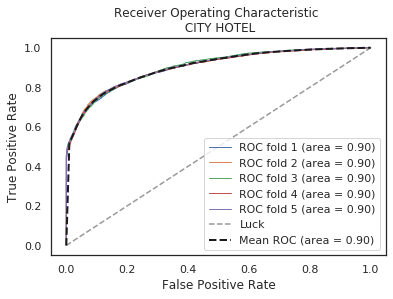

In [ ]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

cv = StratifiedKFold(n_splits=5, random_state=7)
classifier = lgb.LGBMClassifier()
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

i = 0
for train, test in cv.split(x_train_city,y_train_city):
    i+=1
    probas_ = classifier.fit(x_train_city.iloc[train].values, y_train_city.iloc[train]).predict_proba(x_train_city.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train_city.iloc[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic \n CITY HOTEL')
plt.legend(loc="lower right")
plt.show()

###CITY PREDICT

In [ ]:
# 0 - 1 Normalization
x_train_tr = MinMaxScaler().fit_transform(x_train_city)
x_test_tr = MinMaxScaler().fit_transform(x_test_city)
#Fit data train into stacking model
model.fit(x_train_tr,y_train_city.ravel())
y_pred1 = model.predict_proba(x_test_tr)

In [ ]:
# 0 - 1 Normalization
x_train_tr = MinMaxScaler().fit_transform(x_train_city)
x_test_tr = MinMaxScaler().fit_transform(x_test_city)

In [ ]:
y_pred1 = [1 if i>=0.5 else 0 for i in y_pred1]
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import confusion_matrix

Confusion matrix, without normalization
[[11413  2041]
 [ 2672  7302]]


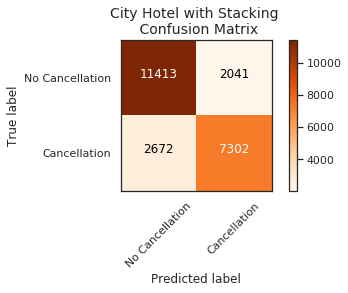

In [ ]:
import itertools
confusion_matrix = confusion_matrix(y_test_city, y_pred1)
labels = ['No Cancellation', 'Cancellation']
plot_confusion_matrix(confusion_matrix, labels, title="City Hotel with Stacking \n Confusion Matrix", cmap=plt.cm.Oranges)

In [ ]:
print(confusion_matrix)
print("\n accuracy score:",accuracy_score(y_test_city, y_pred1))
print("\n recall score:",recall_score(y_test_city, y_pred1))
print("\n precision score:",precision_score(y_test_city, y_pred1))
print('\nf1score:', f1_score(y_test_city, y_pred1, average='macro'))

print("Results of sklearn.metrics:")
print("MAE:",metrics.mean_absolute_error(y_test_city, y_pred1))
print("MSE:", metrics.mean_squared_error(y_test_city, y_pred1))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test_city, y_pred1)))
print("R-Squared:", metrics.r2_score(y_test_city, y_pred1))

[[11413  2041]
 [ 2672  7302]]

 accuracy score: 0.7988304592794946

 recall score: 0.7321034690194506

 precision score: 0.7815476827571444

f1score: 0.792439451707339
Results of sklearn.metrics:
MAE: 0.20116954072050539
MSE: 0.20116954072050539
RMSE: 0.44851927575133865
R-Squared: 0.17716668362269916


In [ ]:
catboost_model.fit(x_train_tr,y_train_city.ravel())
y_pred = catboost_model.predict(x_test_tr)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\ncatboost: \n')
print("\n accuracy score:",accuracy_score(y_test_city, y_pred))
print("recall score:",recall_score(y_test_city, y_pred))
print("precision score:",precision_score(y_test_city, y_pred))
print('f1score:', f1_score(y_test_city, y_pred, average='macro'))

knn_model_2.fit(x_train_tr,y_train_city.ravel())
y_pred = knn_model_2.predict(x_test_tr)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nknn: \n')
print("\n accuracy score:",accuracy_score(y_test_city, y_pred))
print("recall score:",recall_score(y_test_city, y_pred))
print("precision score:",precision_score(y_test_city, y_pred))
print('f1score:', f1_score(y_test_city, y_pred, average='macro'))

ada_model.fit(x_train_tr,y_train_city.ravel())
y_pred = ada_model.predict(x_test_tr)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nada: \n')
print("\n accuracy score:",accuracy_score(y_test_city, y_pred))
print("recall score:",recall_score(y_test_city, y_pred))
print("precision score:",precision_score(y_test_city, y_pred))
print('f1score:', f1_score(y_test_city, y_pred, average='macro'))

random_forest_model.fit(x_train_tr,y_train_city.ravel())
y_pred = random_forest_model.predict(x_test_tr)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nrf: \n')
print("\naccuracy score:",accuracy_score(y_test_city, y_pred))
print("recall score:",recall_score(y_test_city, y_pred))
print("precision score:",precision_score(y_test_city, y_pred))
print('f1score:', f1_score(y_test_city, y_pred, average='macro'))

bagging_model.fit(x_train_tr,y_train_city.ravel())
y_pred = bagging_model.predict(x_test_tr)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nbagging: \n')
print("\naccuracy score:",accuracy_score(y_test_city, y_pred))
print("recall score:",recall_score(y_test_city, y_pred))
print("precision score:",precision_score(y_test_city, y_pred))
print('f1score:', f1_score(y_test_city, y_pred, average='macro'))

xgb_model.fit(x_train_tr,y_train_city.ravel())
y_pred = xgb_model.predict(x_test_tr)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nxgb: \n')
print("\naccuracy score:",accuracy_score(y_test_city, y_pred))
print("recall score:",recall_score(y_test_city, y_pred))
print("precision score:",precision_score(y_test_city, y_pred))
print('f1score:', f1_score(y_test_city, y_pred, average='macro'))

lgbm_model.fit(x_train_tr,y_train_city.ravel())
y_pred = lgbm_model.predict(x_test_tr)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nlgbm: \n')
print("\naccuracy score:",accuracy_score(y_test_city, y_pred))
print("recall score:",recall_score(y_test_city, y_pred))
print("precision score:",precision_score(y_test_city, y_pred))
print('f1score:', f1_score(y_test_city, y_pred, average='macro'))

knn_model.fit(x_train_tr,y_train_city.ravel())
y_pred = knn_model.predict(x_test_tr)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nknn1: \n')
print("\naccuracy score:",accuracy_score(y_test_city, y_pred))
print("recall score:",recall_score(y_test_city, y_pred))
print("precision score:",precision_score(y_test_city, y_pred))
print('f1score:', f1_score(y_test_city, y_pred, average='macro'))

sdg_model.fit(x_train_tr,y_train_city.ravel())
y_pred = sdg_model.predict(x_test_tr)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nsgd: \n')
print("\naccuracy score:",accuracy_score(y_test_city, y_pred))
print("recall score:",recall_score(y_test_city, y_pred))
print("precision score:",precision_score(y_test_city, y_pred))
print('f1score:', f1_score(y_test_city, y_pred, average='macro'))

mlp_model.fit(x_train_tr,y_train_city.ravel())
y_pred = mlp_model.predict(x_test_tr)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\n mlp: \n')
print("\naccuracy score:",accuracy_score(y_test_city, y_pred))
print("recall score:",recall_score(y_test_city, y_pred))
print("precision score:",precision_score(y_test_city, y_pred))
print('f1score:', f1_score(y_test_city, y_pred, average='macro'))

gradient_boosting_model.fit(x_train_tr,y_train_city.ravel())
y_pred = gradient_boosting_model.predict(x_test_tr)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\n gboost: \n')
print("\naccuracy score:",accuracy_score(y_test_city, y_pred))
print("recall score:",recall_score(y_test_city, y_pred))
print("precision score:",precision_score(y_test_city, y_pred))
print('f1score:', f1_score(y_test_city, y_pred, average='macro'))

extra_model.fit(x_train_tr,y_train_city.ravel())
y_pred = extra_model.predict(x_test_tr)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\n extra: \n')
print("\naccuracy score:",accuracy_score(y_test_city, y_pred))
print("recall score:",recall_score(y_test_city, y_pred))
print("precision score:",precision_score(y_test_city, y_pred))
print('f1score:', f1_score(y_test_city, y_pred, average='macro'))




catboost: 


 accuracy score: 0.7510244152296397
recall score: 0.7929617004210948
precision score: 0.6773143786931575
f1score: 0.7495837371281234

knn: 


 accuracy score: 0.7690797336520403
recall score: 0.6999197914577903
precision score: 0.7428176207703767
f1score: 0.7619445765122654

ada: 


 accuracy score: 0.7203773262762506
recall score: 0.6219169841588129
precision score: 0.6905265501502839
f1score: 0.70980857988027

rf: 


accuracy score: 0.8024585965511354
recall score: 0.7239823541207139
precision score: 0.7938654353562006
f1score: 0.7953782280340143

bagging: 


accuracy score: 0.7807751408570941
recall score: 0.7367154601965109
precision score: 0.7453844593223777
f1score: 0.77548566036411

xgb: 


accuracy score: 0.7714273518866314
recall score: 0.6430719871666333
precision score: 0.7813375563406018
f1score: 0.7593665392323559

lgbm: 


accuracy score: 0.7631039781458084
recall score: 0.7184680168437939
precision score: 0.723253936213161
f1score: 0.7575496720783862

knn1:

#ENSEMBLE RESORT

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
#smt = SMOTE(ratio='minority',random_state=7)
#x_train_resort, y_train_resort = smt.fit_sample(x_train_resort, y_train_resort)

##ADABoost

In [ ]:
### META MODELING  WITH ADABOOST, RF, EXTRATREES and GRADIENTBOOSTING

# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["entropy"],
              "base_estimator__splitter" :   ["best"],
              "algorithm" : ["SAMME.R"],
              "n_estimators" :[2],
              "learning_rate":  [0.3]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(x_train_resort,y_train_resort)

ada_best = gsadaDTC.best_estimator_
gsadaDTC.best_score_

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    3.7s finished


0.8322849962592883

In [ ]:
ada_best

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                    

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                                                         random_state=None,
                                                         splitter='best'),
                   learning_rate=0.3, n_estimators=2, random_state=7)

##ExtraTrees

In [ ]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1],
              "min_samples_split": [10],
              "min_samples_leaf": [1],
              "bootstrap": [False],
              "n_estimators" :[300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(x_train_resort,y_train_resort)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
ExtC_best

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features=1,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=300,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

##Random Forest

In [ ]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [3],
              "min_samples_split": [3],
              "min_samples_leaf": [10],
              "bootstrap": [False],
              "n_estimators" :[100],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(x_train_resort,y_train_resort)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

In [ ]:
RFC_best

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

##GBoost

In [ ]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [300],
              'learning_rate': [0.1],
              'max_depth': [8],
              'min_samples_leaf': [100],
              'max_features': [0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(x_train_resort,y_train_resort)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

In [ ]:
GBC_best

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=0.1, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=100, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

##Manual tuning parameter result for gb model

In [ ]:
xgb_model = xgb.XGBClassifier(max_depth=8, 
                         n_estimators=500, 
                         min_child_weight=1000,  
                         colsample_bytree=0.7, 
                         subsample=0.7, 
                         eta=0.3, 
                         seed=0)

catboost_model = CatBoostClassifier(
    iterations=500,
    max_ctr_complexity=4,
    random_seed=0,
    od_type='Iter',
    od_wait=25,
    depth=4,
    silent=True
)


lgbm_model = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=1000)

extra_model = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features=1,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=300,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
random_forest_model = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
gradient_boosting_model = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=0.1, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=100, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
bagging_model = BaggingClassifier(base_estimator=lgb.LGBMClassifier(max_depth=-1, random_state=314, 
                    silent=True, metric='None', n_jobs=4, n_estimators=1000))

##Model linear

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=9, leaf_size=13, n_jobs=-1)

knn_model_2 = KNeighborsClassifier(n_neighbors=5, leaf_size=9, n_jobs=-1)

sdg_model = linear_model.SGDClassifier(loss='log', random_state=0)

mlp_model = MLPClassifier(alpha=0.1, max_iter=1000)

gaus_model = GaussianNB()

ada_model = AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                                                         random_state=None,
                                                         splitter='best'),
                   learning_rate=0.3, n_estimators=2, random_state=7)

meta_model_1 = LogisticRegression(n_jobs=-1)

        

##F1 Score

In [ ]:
skf = StratifiedKFold(n_splits=10, random_state=7)
i = 0
model = RandomForestClassifier()
for train_index, test_index in skf.split(x_train_resort,y_train_resort):
    i+=1
    X_train_split, X_test_split = x_train_resort.iloc[train_index], x_train_resort.iloc[test_index]
    y_train_split, y_test_split = y_train_resort.iloc[train_index], y_train_resort.iloc[test_index]
    model.fit(X_train_split,y_train_split)
    y_pred = model.predict(X_test_split)
    val =  f1_score(y_test_split, y_pred, average='micro')
    #y_result[test_index] = predict
    #score.append(val)
    print(f"Score f1_micro in CV - {i}: {val}")

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Score f1_micro in CV - 1: 0.8535610465116279
Score f1_micro in CV - 2: 0.8429661941112323
Score f1_micro in CV - 3: 0.8585968738640494
Score f1_micro in CV - 4: 0.8538713195201745
Score f1_micro in CV - 5: 0.8396946564885496
Score f1_micro in CV - 6: 0.8502362777171938
Score f1_micro in CV - 7: 0.8480552526354053
Score f1_micro in CV - 8: 0.8444202108324246
Score f1_micro in CV - 9: 0.8505997818974917
Score f1_micro in CV - 10: 0.8433296982915304


##AUC RF

In [ ]:
skf = StratifiedKFold(n_splits=10, random_state=7)
i = 0
model = RandomForestClassifier()
for train_index, test_index in skf.split(x_train_resort,y_train_resort):
    i+=1
    X_train_split, X_test_split = x_train_resort[train_index], x_train_resort[test_index]
    y_train_split, y_test_split = y_train_resort[train_index], y_train_resort[test_index]
    model.fit(X_train_split,y_train_split)
    y_pred = model.predict_proba(X_test_split)[:,1]
    val =  roc_auc_score(y_test_split, y_pred)
    #y_result[test_index] = predict
    #score.append(val)
    print(f"Score AUC in CV - {i}: {val}")

##AUC LGBM

##AUC Catboost

In [ ]:
skf = StratifiedKFold(n_splits=10, random_state=7)
i = 0
model = CatBoostClassifier(iterations=300,silent=True)
for train_index, test_index in skf.split(x_train_resort,y_train_resort):
    i+=1
    X_train_split, X_test_split = x_train_resort[train_index], x_train_resort[test_index]
    y_train_split, y_test_split = y_train_resort[train_index], y_train_resort[test_index]
    model.fit(X_train_split,y_train_split)
    y_pred = model.predict_proba(X_test_split)[:,1]
    val =  roc_auc_score(y_test_split, y_pred)
    #y_result[test_index] = predict
    #score.append(val)
    print(f"Score AUC in CV - {i}: {val}")

##MODEL

In [ ]:
from StackingClassifier import StackingClassifier
model = StackingClassifier(
    base_classifiers=[
        #xgb_model,
        #catboost_model,
        #lgbm_model,
        knn_model,
        #knn_model_2,
        #sdg_model,
        mlp_model,
        ada_model,
        #gradient_boosting_model,
        extra_model,
        #random_forest_model,
        #bagging_model
        
    ],
    combiner=meta_model_1,
    technique=StackingClassifier.OUTOFFOLDS,
)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



##AUC STACKING

In [ ]:
skf = StratifiedKFold(n_splits=3)
i = 0

# 0 - 1 Normalization
x_train_tr = MinMaxScaler().fit_transform(x_train_resort)
for train_index, test_index in skf.split(x_train_tr,y_train_resort):
    i+=1
    X_train_split, X_test_split = x_train_tr[train_index], x_train_tr[test_index]
    y_train_split, y_test_split = y_train_resort[train_index], y_train_resort[test_index]
    model.fit(X_train_split,y_train_split.ravel())
    y_pred = model.predict_proba(X_test_split)
    val =  roc_auc_score(y_test_split, y_pred)
    #y_result[test_index] = predict
    #score.append(val)
    print(f"Score AUC in CV - {i}: {val}")

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/usr/local/lib/python3.6/dist-packag

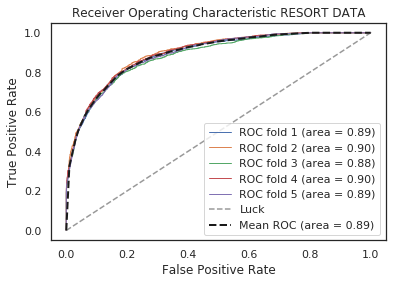

In [ ]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

cv = StratifiedKFold(n_splits=5, random_state=7)
classifier = lgb.LGBMClassifier()
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

i = 0
for train, test in cv.split(x_train_resort,y_train_resort):
    i+=1
    probas_ = classifier.fit(x_train_resort.iloc[train], y_train_resort.iloc[train]).predict_proba(x_train_resort.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train_resort.iloc[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic RESORT DATA')
plt.legend(loc="lower right")
plt.show()

###PREDICT RESORT

In [ ]:
# 0 - 1 Normalization
x_train_tr = MinMaxScaler().fit_transform(x_train_resort)
x_test_tr = MinMaxScaler().fit_transform(x_test_resort)
#Fit data train into stacking model
model.fit(x_train_tr,y_train_resort.ravel())
y_pred1 = model.predict_proba(x_test_tr)

In [ ]:
y_pred1 = [1 if i>=0.5 else 0 for i in y_pred1]
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import confusion_matrix

Confusion matrix, without normalization
[[8012  468]
 [1554 1757]]


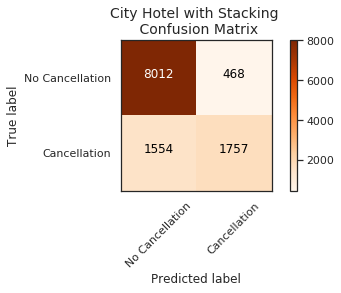

In [ ]:
#confusion_matrix = confusion_matrix(y_test_resort, y_pred1)
import itertools
labels = ['No Cancellation', 'Cancellation']
plot_confusion_matrix(confusion_matrix, labels, title="City Hotel with Stacking \n Confusion Matrix", cmap=plt.cm.Oranges)

In [ ]:
import sklearn.metrics as metrics
print(confusion_matrix)
print("\n accuracy score:",accuracy_score(y_test_resort, y_pred1))
print("\n recall score:",recall_score(y_test_resort, y_pred1))
print("\n precision score:",precision_score(y_test_resort, y_pred1))
print('\nf1score:', f1_score(y_test_resort, y_pred1, average='macro'))

print("Results of sklearn.metrics:")
print("MAE:",metrics.mean_absolute_error(y_test_resort, y_pred1))
print("MSE:", metrics.mean_squared_error(y_test_resort, y_pred1))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test_resort, y_pred1)))

[[8012  468]
 [1554 1757]]

 accuracy score: 0.8285132728352133

 recall score: 0.5306553911205074

 precision score: 0.7896629213483146

f1score: 0.7613536721185872
Results of sklearn.metrics:
MAE: 0.1714867271647867
MSE: 0.1714867271647867
RMSE: 0.4141095593738289


In [ ]:
catboost_model.fit(x_train_tr,y_train_resort.ravel())
y_pred = catboost_model.predict(x_test_tr)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\ncatboost: \n')
print("\n accuracy score:",accuracy_score(y_test_resort, y_pred))
print("recall score:",recall_score(y_test_resort, y_pred))
print("precision score:",precision_score(y_test_resort, y_pred))
print('f1score:', f1_score(y_test_resort, y_pred, average='macro'))

knn_model_2.fit(x_train_tr,y_train_resort.ravel())
y_pred = knn_model_2.predict(x_test_tr)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nknn: \n')
print("\n accuracy score:",accuracy_score(y_test_resort, y_pred))
print("recall score:",recall_score(y_test_resort, y_pred))
print("precision score:",precision_score(y_test_resort, y_pred))
print('f1score:', f1_score(y_test_resort, y_pred, average='macro'))

ada_model.fit(x_train_tr,y_train_resort.ravel())
y_pred = ada_model.predict(x_test_tr)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nada: \n')
print("\n accuracy score:",accuracy_score(y_test_resort, y_pred))
print("recall score:",recall_score(y_test_resort, y_pred))
print("precision score:",precision_score(y_test_resort, y_pred))
print('f1score:', f1_score(y_test_resort, y_pred, average='macro'))

random_forest_model.fit(x_train_tr,y_train_resort.ravel())
y_pred = random_forest_model.predict(x_test_tr)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nrf: \n')
print("\naccuracy score:",accuracy_score(y_test_resort, y_pred))
print("recall score:",recall_score(y_test_resort, y_pred))
print("precision score:",precision_score(y_test_resort, y_pred))
print('f1score:', f1_score(y_test_resort, y_pred, average='macro'))

bagging_model.fit(x_train_tr,y_train_resort.ravel())
y_pred = bagging_model.predict(x_test_tr)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nbagging: \n')
print("\naccuracy score:",accuracy_score(y_test_resort, y_pred))
print("recall score:",recall_score(y_test_resort, y_pred))
print("precision score:",precision_score(y_test_resort, y_pred))
print('f1score:', f1_score(y_test_resort, y_pred, average='macro'))

xgb_model.fit(x_train_tr,y_train_resort.ravel())
y_pred = xgb_model.predict(x_test_tr)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nxgb: \n')
print("\naccuracy score:",accuracy_score(y_test_resort, y_pred))
print("recall score:",recall_score(y_test_resort, y_pred))
print("precision score:",precision_score(y_test_resort, y_pred))
print('f1score:', f1_score(y_test_resort, y_pred, average='macro'))


lgbm_model.fit(x_train_tr,y_train_resort.ravel())
y_pred = lgbm_model.predict(x_test_tr)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nlgbm: \n')
print("\naccuracy score:",accuracy_score(y_test_resort, y_pred))
print("recall score:",recall_score(y_test_resort, y_pred))
print("precision score:",precision_score(y_test_resort, y_pred))
print('f1score:', f1_score(y_test_resort, y_pred, average='macro'))

knn_model.fit(x_train_tr,y_train_resort.ravel())
y_pred = knn_model.predict(x_test_tr)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nknn1: \n')
print("\naccuracy score:",accuracy_score(y_test_resort, y_pred))
print("recall score:",recall_score(y_test_resort, y_pred))
print("precision score:",precision_score(y_test_resort, y_pred))
print('f1score:', f1_score(y_test_resort, y_pred, average='macro'))

sdg_model.fit(x_train_tr,y_train_resort.ravel())
y_pred = sdg_model.predict(x_test_tr)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\nsgd: \n')
print("\naccuracy score:",accuracy_score(y_test_resort, y_pred))
print("recall score:",recall_score(y_test_resort, y_pred))
print("precision score:",precision_score(y_test_resort, y_pred))
print('f1score:', f1_score(y_test_resort, y_pred, average='macro'))

mlp_model.fit(x_train_tr,y_train_resort.ravel())
y_pred = mlp_model.predict(x_test_tr)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\n mlp: \n')
print("\naccuracy score:",accuracy_score(y_test_resort, y_pred))
print("recall score:",recall_score(y_test_resort, y_pred))
print("precision score:",precision_score(y_test_resort, y_pred))
print('f1score:', f1_score(y_test_resort, y_pred, average='macro'))

gradient_boosting_model.fit(x_train_tr,y_train_resort.ravel())
y_pred = gradient_boosting_model.predict(x_test_tr)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\n gboost: \n')
print("\naccuracy score:",accuracy_score(y_test_resort, y_pred))
print("recall score:",recall_score(y_test_resort, y_pred))
print("precision score:",precision_score(y_test_resort, y_pred))
print('f1score:', f1_score(y_test_resort, y_pred, average='macro'))

extra_model.fit(x_train_tr,y_train_resort.ravel())
y_pred = extra_model.predict(x_test_tr)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
print('\n extra: \n')
print("\naccuracy score:",accuracy_score(y_test_resort, y_pred))
print("recall score:",recall_score(y_test_resort, y_pred))
print("precision score:",precision_score(y_test_resort, y_pred))
print('f1score:', f1_score(y_test_resort, y_pred, average='macro'))


catboost: 


 accuracy score: 0.8233398354677296
recall score: 0.5179704016913319
precision score: 0.7788374205267938
f1score: 0.7534427378002398

knn: 


 accuracy score: 0.8084980069544568
recall score: 0.5650860767139837
precision score: 0.6957976943101525
f1score: 0.7476199332650817

ada: 


 accuracy score: 0.788991603765584
recall score: 0.40924192086982786
precision score: 0.7180710121886592
f1score: 0.6930096465434419

rf: 


accuracy score: 0.8317360698838097
recall score: 0.546964663243733
precision score: 0.7891067538126362
f1score: 0.767862044941676

bagging: 


accuracy score: 0.8213043847001951
recall score: 0.5170643310178193
precision score: 0.7711711711711712
f1score: 0.7511656966704584

xgb: 


accuracy score: 0.7660927826308201
recall score: 0.37813349441256416
precision score: 0.6417221937467965
f1score: 0.6626594193517333

lgbm: 


accuracy score: 0.8168942413705369
recall score: 0.5279371790999698
precision score: 0.7457337883959044
f1score: 0.748890551656174

kn

#ALL MODELING

In [ ]:
X

hotel  adults  children  babies  meal  market_segment  \
2           1       2       0.0       0     0               3   
3           1       2       0.0       0     1               3   
4           1       2       0.0       0     0               6   
5           1       2       0.0       0     2               5   
6           1       2       0.0       0     0               6   
...       ...     ...       ...     ...   ...             ...   
119205      0       2       0.0       0     0               5   
119206      0       2       0.0       0     0               6   
119207      0       2       0.0       0     3               6   
119208      0       2       0.0       0     0               6   
119209      0       2       0.0       0     0               6   

        distribution_channel  is_repeated_guest  previous_cancellations  \
2                          1                  0                       0   
3                          1                  0                       0   
4                          3                  0                       0   
5                          3                  0                       0   
6                          3                  0                       0   
...                      ...                ...                     ...   
119205                     3                  0                       0   
119206                     3                  0                       0   
119207                     3                  0                       0   
119208                     3                  0                       0   
119209                     3                  0                       0   

        previous_bookings_not_canceled  reserved_room_type  \
2                                    0                   2   
3                                    0                   2   
4                                    0                   0   
5                                    0                   3   
6                                    0                   4   
...                                ...                 ...   
119205                               0                   0   
119206                               0                   0   
119207                               0                   0   
119208                               0                   3   
119209                               0                   3   

        assigned_room_type  booking_changes  deposit_type  \
2                        2                0             0   
3                        2                0             0   
4                        0                0             0   
5                        3                0             0   
6                        4                0             0   
...                    ...              ...           ...   
119205                   0                0             0   
119206                   0                0             0   
119207                   0                0             0   
119208                   3                0             0   
119209                   3                0             0   

        days_in_waiting_list  customer_type  required_car_parking_spaces  \
2                          0              2                            0   
3                          0              2                            0   
4                          0              2                            0   
5                          0              2                            0   
6                          0              2                            0   
...                      ...            ...                          ...   
119205                     0              2                            0   
119206                     0              2                            0   
119207                     0              2                            0   
119208                     0              2                            0   
119209      